# Earlier test block

In [4]:
%run -i 'STEP1_scraping_cleaning_merge.py'
d1 = scrape(initial_panel='202002',
            current_panel='202104'
                ).open_initial_panel_data(
                ).get_appids_from_initial_panel_data(
                ).scraping_apps_according_to_id()

202002  first panel contains  8042  IDs.


In [3]:
dlist = d1.id_list
type(dlist)
for i in dlist:
    print(i)
print(len(dlist))
d2list = list(dlist)
d3list = [i for sublist in d2list for i in sublist]

['com.finazzi.distquake', 'com.honeyponey.bubbletea', 'com.thomasbowker.lynerelease', 'com.planeth.rhythm', 'com.PSV.Baby_Cooking_School', 'com.candyrufusgames.survivalcraft2', 'com.biogen.cleo.us', 'com.exatools.skitracker', 'com.tribeplay.pandaspace', 'com.sbi.SBIFreedomPlus', 'com.plarium.vikings', 'com.whaleapp.hotelblast', 'com.noodlecake.punchquest', 'com.zvooq.openplay', 'com.solou.catendless.run', 'com.popularapp.periodcalendar', 'com.philseven.loyalty', 'com.fifa.fifaapp.android', 'com.pixel.coloring.color.by.number', 'com.snagajob.jobseeker', 'com.wordsmobile.golfchampionship', 'com.mcprohosting.beam', 'com.tiimoapp.androidapp', 'com.chuchutv.android', 'com.mapmyride.android2', 'com.bluewizard.slayawaycamp', 'com.lucky.notewidget', 'com.infinitewallpapers.popular.brands.wallpapers', 'com.oki.colorsnew', 'com.hoteltonight.android.prod', 'com.americanwell.android.member.amwell', 'com.savingstar.SavingStar', 'com.zeptolab.timetravel.free.google', 'com.coffeestainstudios.goatsimu

# Test Block for Pre-processing

In [3]:
%run -i 'STEP2_pre_processing.py'

initial_panel='201907'
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102',
              '202103']


original_vars = ['containsAds',
                 'offersIAP']

imputed_vars = ['Imputed' + i for i in original_vars]

d3 = pre_processing(
            initial_panel=initial_panel,
            all_panels=all_panels,
            tcn='description'
            ).open_merged_df(
            ).remove_rows_with_text_col_missing_in_all_panels(
        ).impute_text_col(
        ).prepare_text_col(
        ).create_time_invariant_developer_col(
        ).compare_original_and_imputed_developer()

201907  before removing rows with all missing in  description  has shape :  (10576, 398)
201907 after removing rows with all missing in  description  has shape :  (10576, 398)

201907  successfully imputed missing text columns for TEXT COLUMN (combined from all panels) of the dataset
assuming all text columns are time-invariant
201907  finished cleaning combined text columns. 

201907  shape :  (10576, 416)
201907  appids with time-invariant developer for ALL (none missing) panels :  9976
201907  appids changed developer throughout ALL (none missing) panels :  600


In [ ]:
    .count_missing(
                    var_list=original_vars,
                    name='missing_count_before_imputation'
        ).impute_list_of_vars(
                    list_of_vars=original_vars
        ).count_missing(
                    var_list=imputed_vars,
                    name='missing_count_after_imputation'
        ).find_rows_to_remove_after_imputation(
            var_list=imputed_vars
        ).compare_original_and_imputed_var(
        var_list=original_vars)

# Test Block for Divide Sub-samples

In [7]:
%run -i 'STEP3_sub_samples.py'

initial_panel='201907'
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102',
              '202103',
              '202104',
              '202105']

/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP3_sub_samples.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [29]:
%run -i 'STEP3_sub_samples.py'
d1 = divide(initial_panel=initial_panel,
            all_panels=all_panels
            ).open_imputed_and_deleted_missing_df(
            ).create_star_developer_var(
            ).create_subsample_var_dict(
            ).count_apps_in_each_category(
            ).create_division_rules(
            )

100%|██████████| 4/4 [00:10<00:00,  2.67s/it]
/home/naixin/anaconda3/envs/GOOGLE_PLAY/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/naixin/anaconda3/envs/GOOGLE_PLAY/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/naixin/anaconda3/envs/GOOGLE_PLAY/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See 

201907  : top digital firms.
top_digital_firms
0    8871
1     447
dtype: int64
201907  : non-top digital firms.
non-top_digital_firms
0     447
1    8871
dtype: int64
201907  count number of apps in each group (potential sub-samples) 
201907  finished creating division rules for sub samples and saved dataframe. 


In [30]:
%run -i 'STEP3_sub_samples.py'
d2 = divide(initial_panel=initial_panel,
            all_panels=all_panels
            ).open_subsamples_df_and_division_rules(
            ).subsamples_count_pandas()

In [4]:
# test block
c = d1.final_division_counts['minInstalls']['ImputedminInstalls_tier1']
c1 = c[1]

In [5]:
d2 = d1.subsamples_count_pandas()

AttributeError: 'divide' object has no attribute 'subsamples_count_pandas'

# Test Block for NLP

In [ ]:
%run -i 'STEP4_NLP_pipeline.py'

initial_panel='201907'
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102',
              '202103',
              '202104']

d1 = nlp_pipeline(
            tcn='description',
            initial_panel=initial_panel,
            all_panels=all_panels
            ).open_divided_df(
            ).divide_into_subsamples(
            ).generate_save_input_text_col(
            )


# Test Block for Preparing Long Table for Regression

In [14]:
%run -i 'STEP5_Reg_Long_Table_Preparation.py'

initial_panel='201907'
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102',
              '202103',
              '202104']


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:251: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


FINISHED creating niche scale dummies for full sample: 
['full_full_NicheScaleDummy_0', 'full_full_NicheScaleDummy_1', 'full_full_NicheScaleDummy_2', 'full_full_NicheScaleDummy_3', 'full_full_NicheScaleDummy_4', 'full_full_NicheScaleDummy_5', 'full_full_NicheScaleDummy_6', 'full_full_NicheScaleDummy_7', 'full_full_NicheScaleDummy_8', 'full_full_NicheScaleDummy_9', 'full_full_NicheScaleDummy_10', 'full_full_NicheScaleDummy_11', 'full_full_NicheScaleDummy_12', 'full_full_NicheScaleDummy_13', 'full_full_NicheScaleDummy_14', 'full_full_NicheScaleDummy_15', 'full_full_NicheScaleDummy_16', 'full_full_NicheScaleDummy_17', 'full_full_NicheScaleDummy_18', 'full_full_NicheScaleDummy_19']
Gathered niche variables list (including interactions if exist):  75
['full_full_NicheDummy', 'minInstalls_ImputedminInstalls_tier1_NicheDummy', 'minInstalls_ImputedminInstalls_tier2_NicheDummy', 'minInstalls_ImputedminInstalls_tier3_NicheDummy', 'genreId_ART_AND_DESIGN_NicheDummy', 'genreId_COMICS_NicheDummy', 

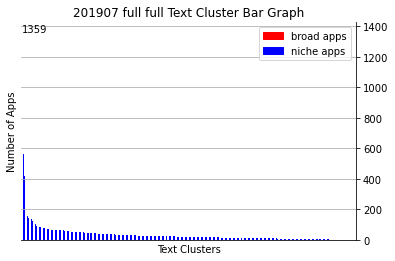

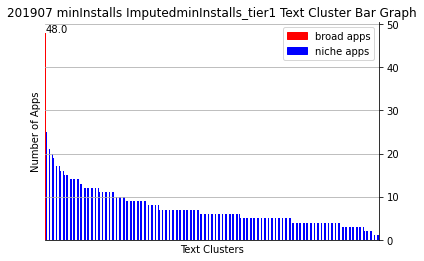

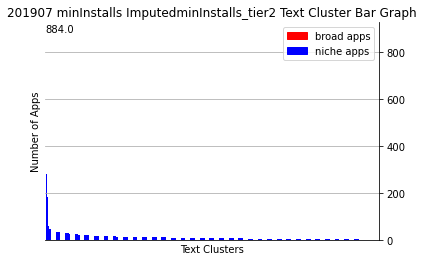

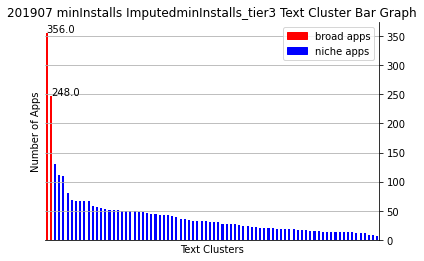

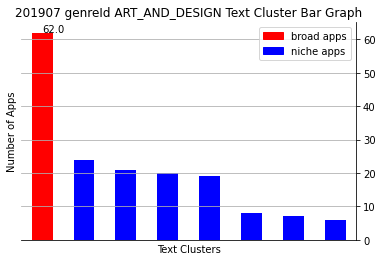

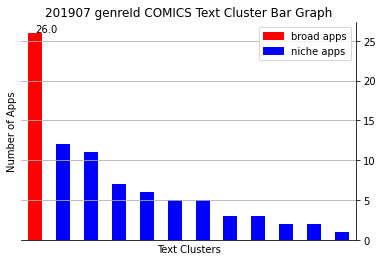

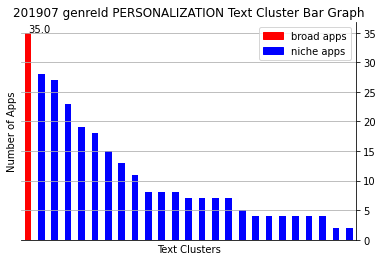

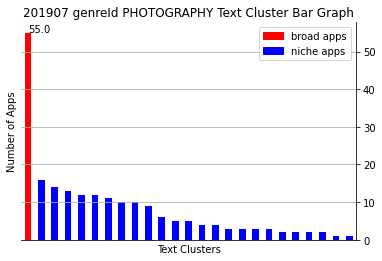

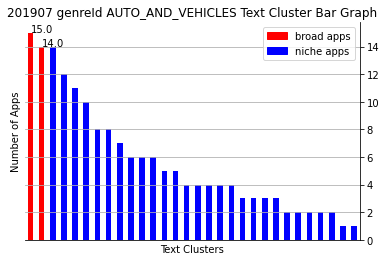

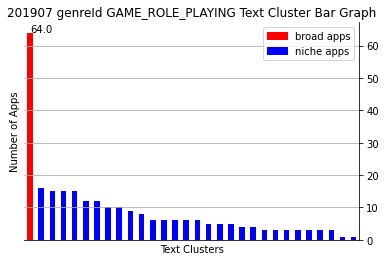

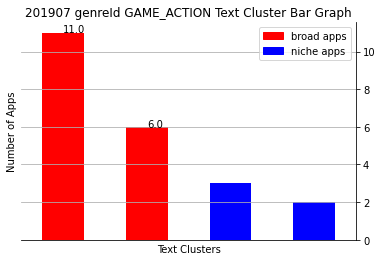

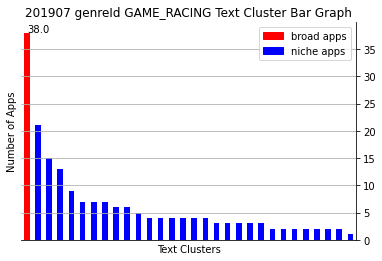

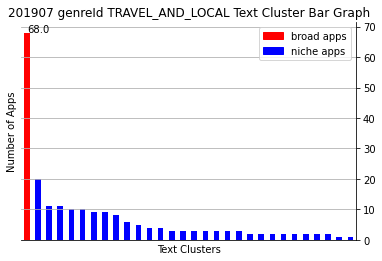

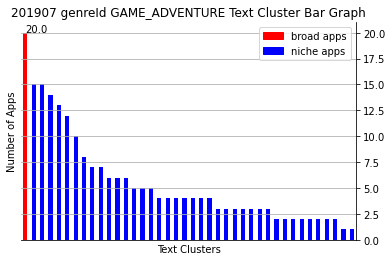

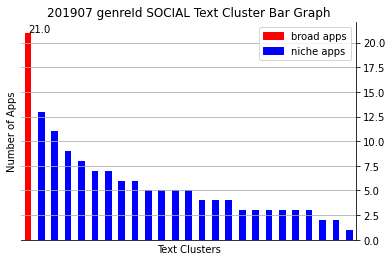

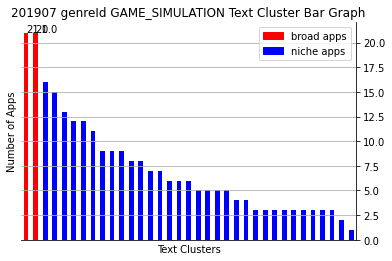

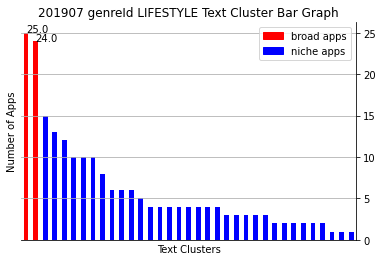

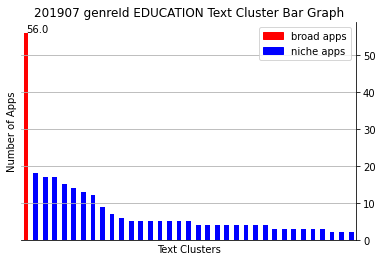

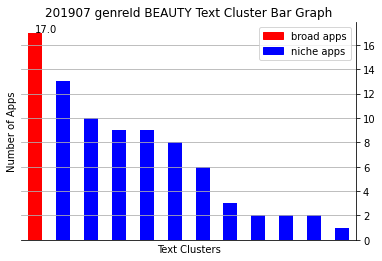

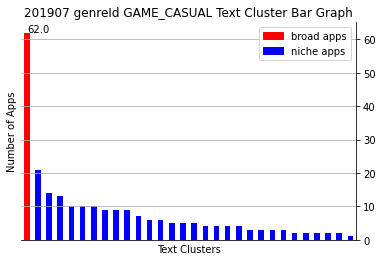

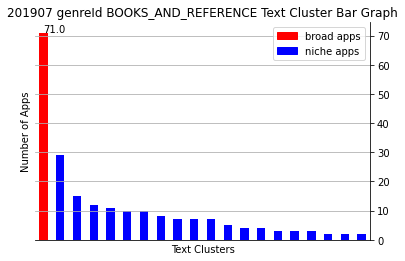

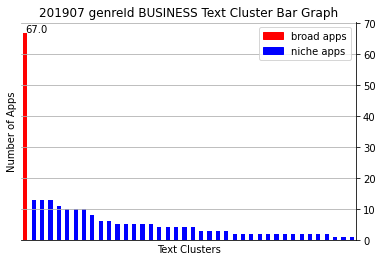

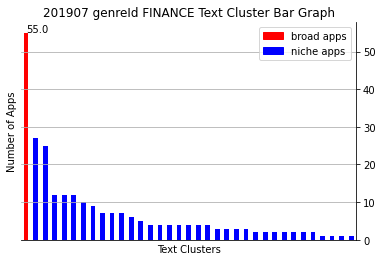

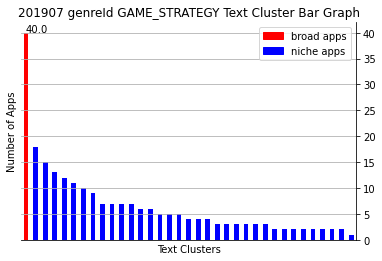

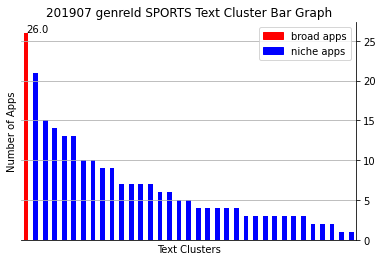

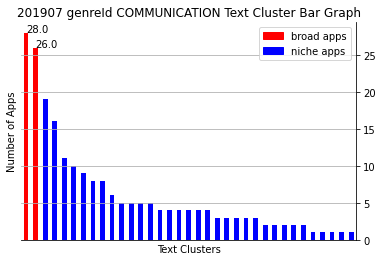

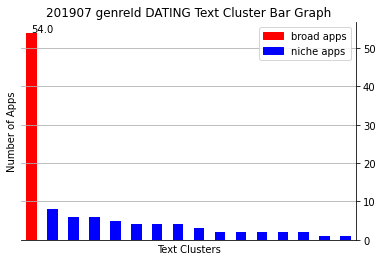

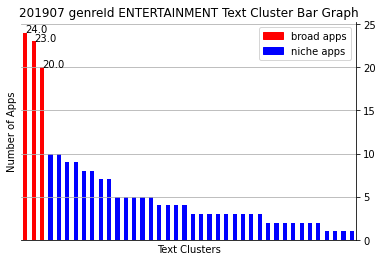

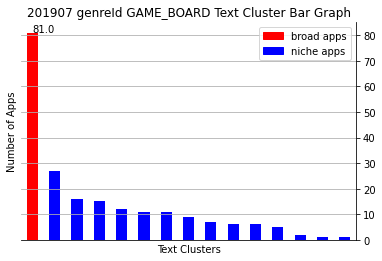

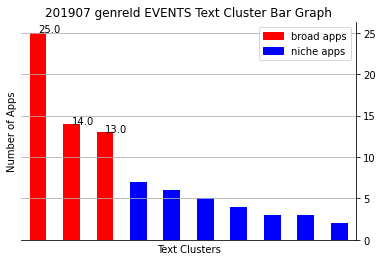

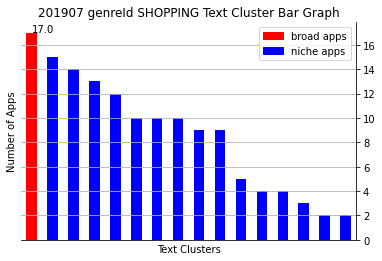

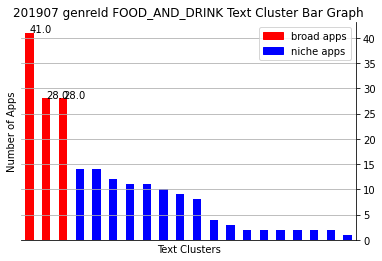

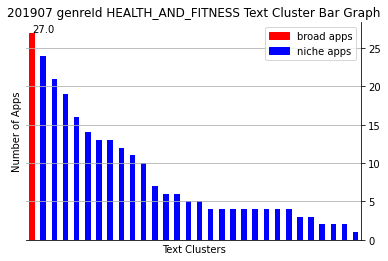

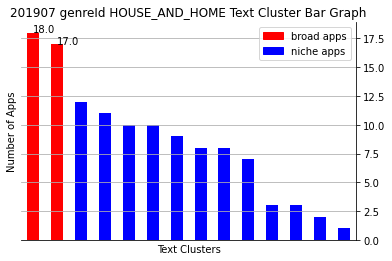

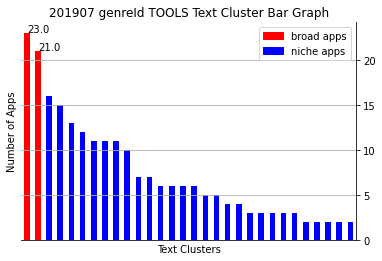

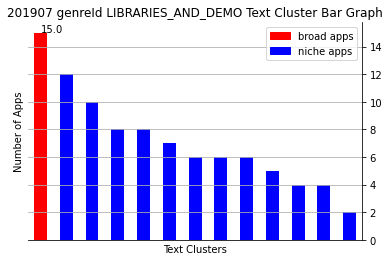

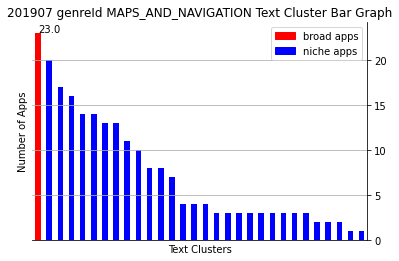

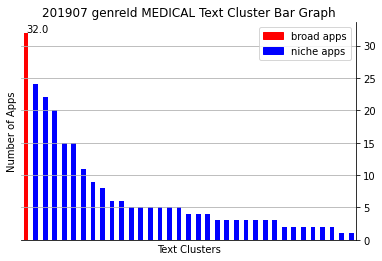

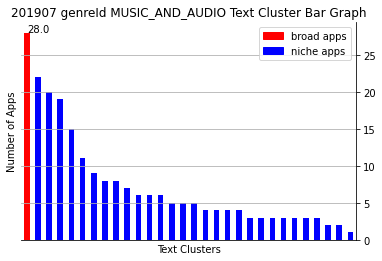

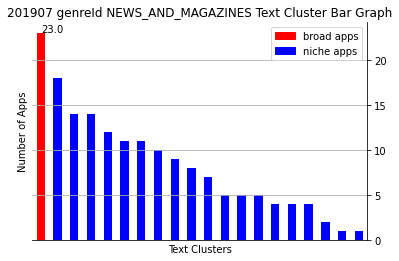

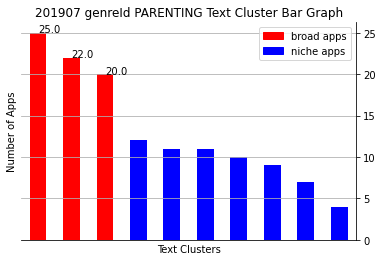

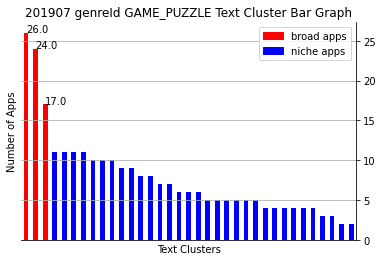

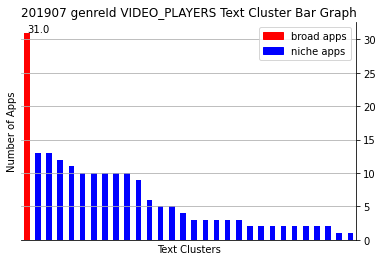

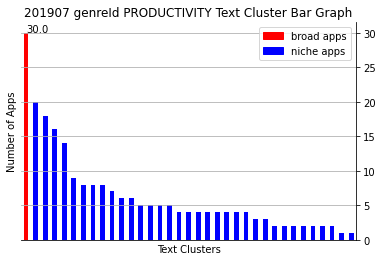

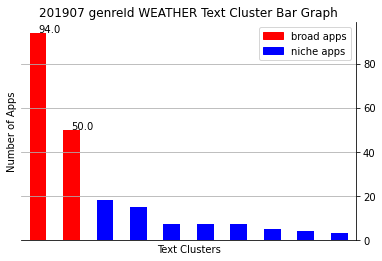

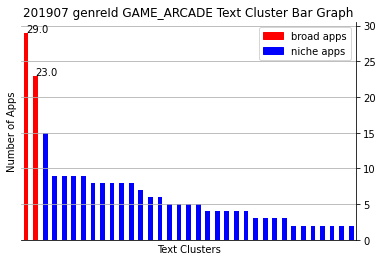

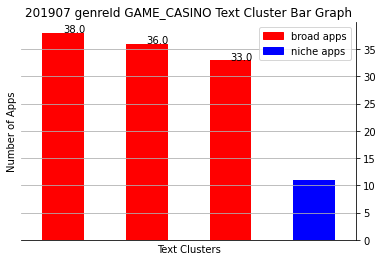

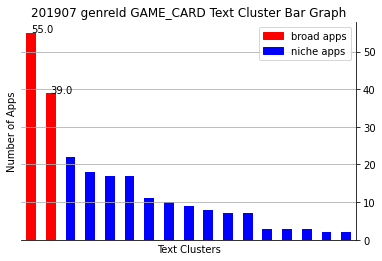

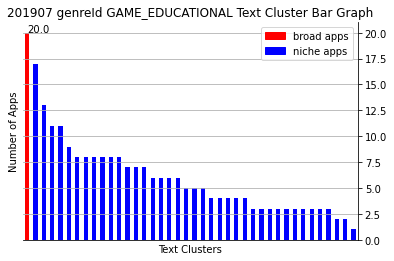

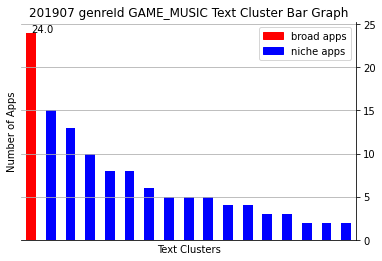

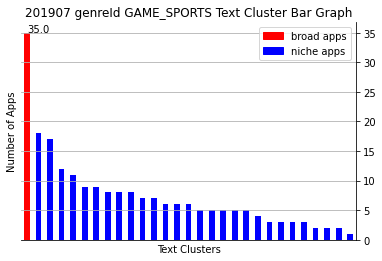

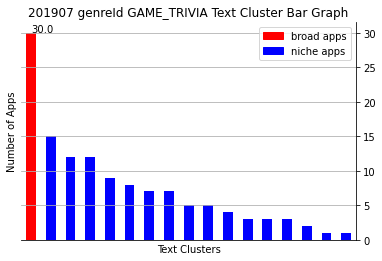

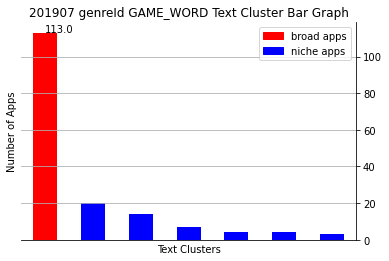

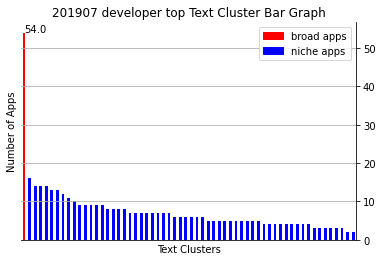

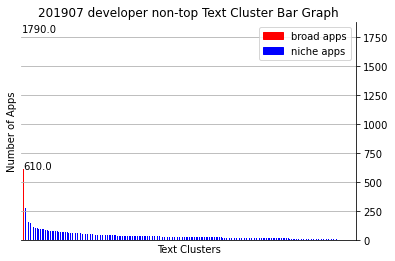

In [15]:
%run -i 'STEP5_Reg_Long_Table_Preparation.py'

d1 = reg_preparation(
         initial_panel=initial_panel,
         all_panels=all_panels,
         tcn = 'description'
    ).open_imputed_deleted_divided_df(
    ).open_predicted_labels_dict(
    ).combine_text_labels_with_df(
    ).create_subsample_name_dict(
    ).check_text_label_contents(
    ).create_subsample_name_dict(
    ).text_cluster_group_count(
    ).text_cluster_bar_chart(
    ).create_NicheDummy(
    ).create_NicheScaleDummies_for_full_sample(
        n=20
    ).create_post_dummy_and_interactions(
        n=20
    ).create_individual_app_dummies(
    ).create_contentRating_dummy(
    ).count_number_of_days_since_released(
    ).create_paid_dummies(
    ).create_generic_true_false_dummies(
        cat_var='offersIAP'
    ).create_generic_true_false_dummies(
        cat_var='containsAds'
    ).create_minInstalls_dummies(
    ).impute_missingSize_as_zero(
    ).create_demean_time_variant_vars(
        time_variant_vars = ['Imputedscore',
                             'minInstallsTop',
                             'minInstallsMiddle',
                             'Imputedreviews']
    ).standardize_continuous_vars(
        con_var='DeMeanedImputedreviews',
        method='zscore'
    ).convert_df_from_wide_to_long(
        time_variant_vars = ['Imputedscore',
                             'minInstallsTop',
                             'minInstallsMiddle',
                             'Imputedreviews',
                             'Imputedprice',
                             'offersIAPTrue',
                             'containsAdsTrue',
                             'paidTrue',
                             'PostDummy',
                             'DeMeanedImputedscore',
                             'DeMeanedminInstallsTop',
                             'DeMeanedminInstallsMiddle',
                             'ZScoreDeMeanedImputedreviews'],
        time_invariant_vars = ['contentRatingAdult',
                               'size',
                               'DaysSinceReleased'],
        n=20
    )

# Test Block for Graphing Niche Scale Against Key Variables

In [1]:
%run -i 'STEP5_Reg_Long_Table_Preparation.py'

initial_panel='201907'
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102',
              '202103',
              '202104']

/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Apps'] = 1 # count column
/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP5_Reg_Long_Table_Preparation.py:389: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

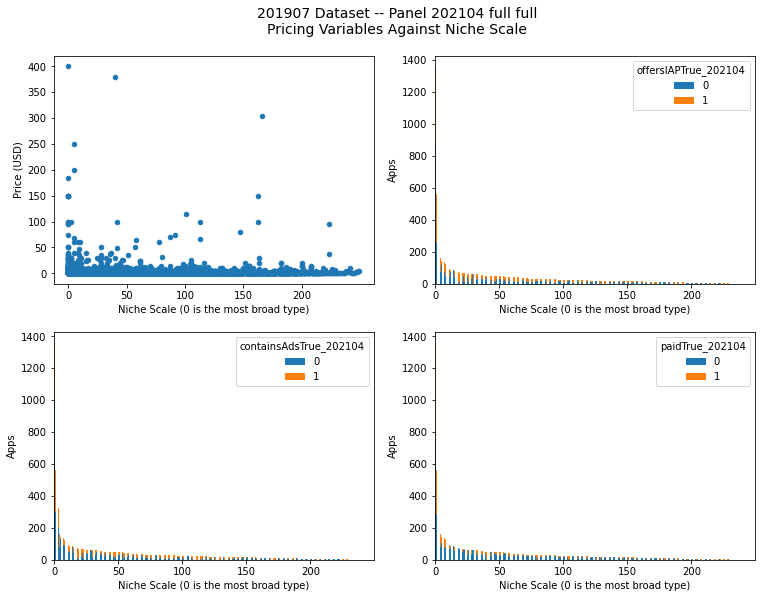

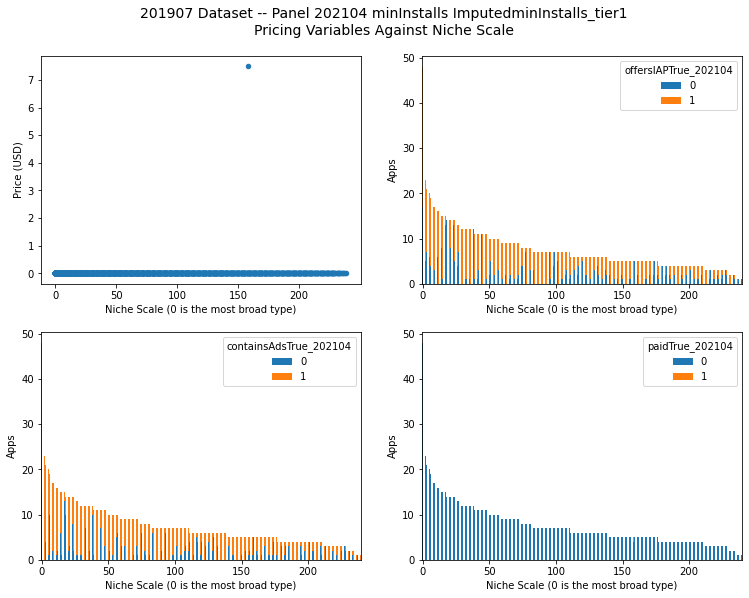

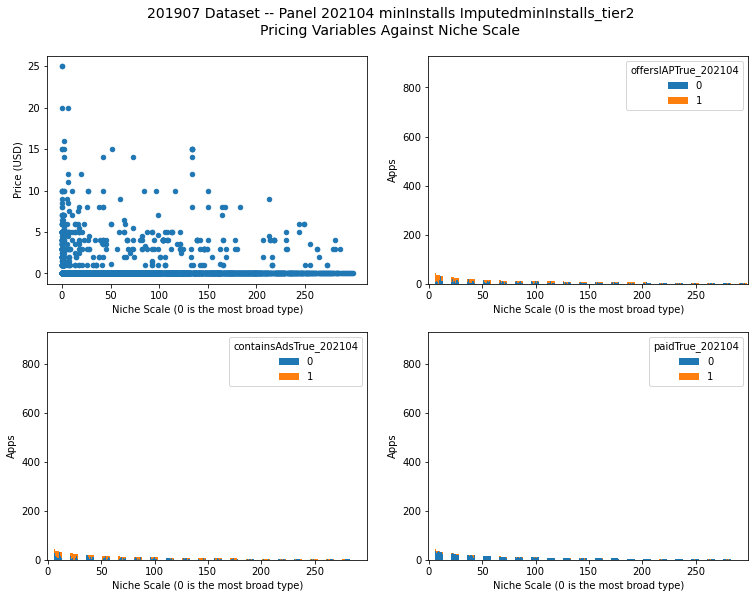

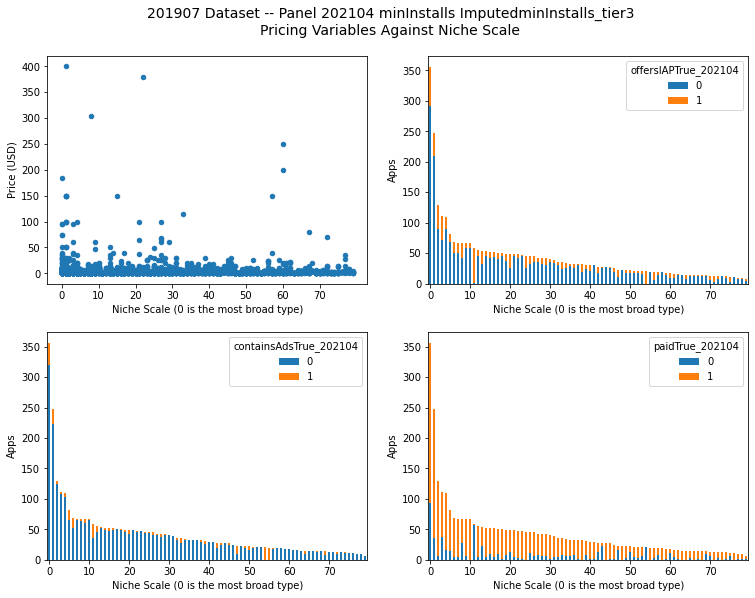

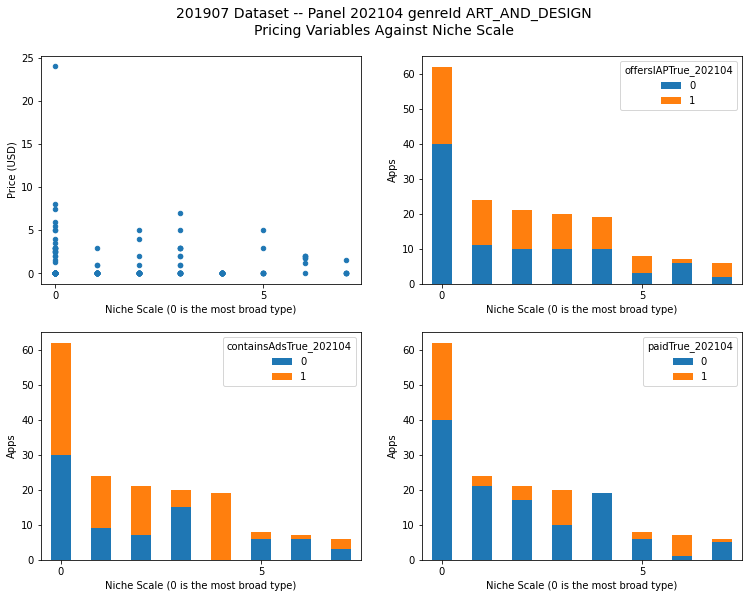

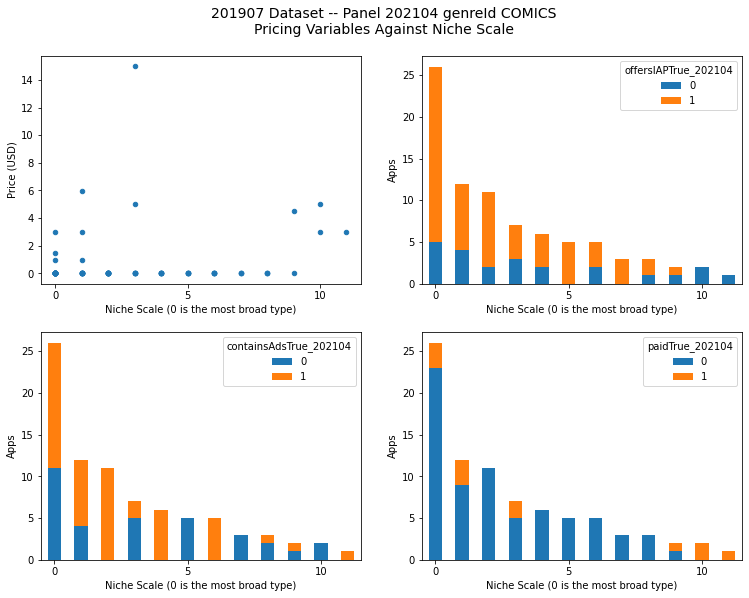

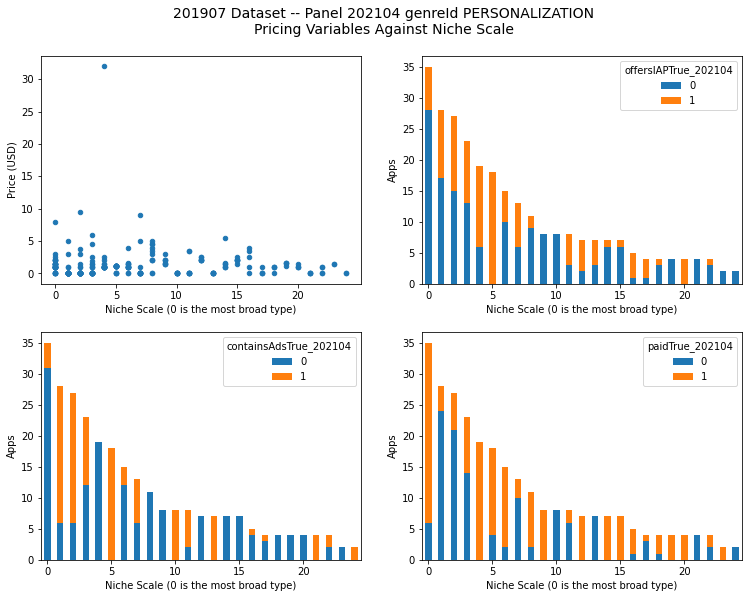

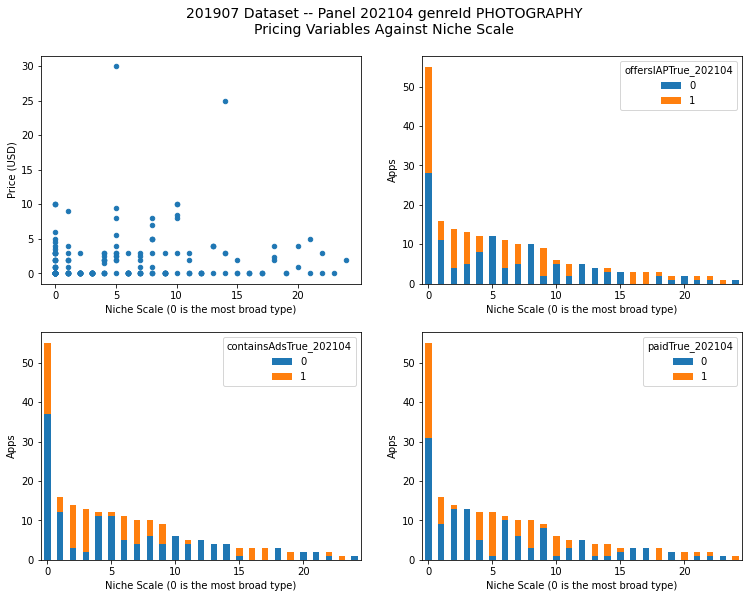

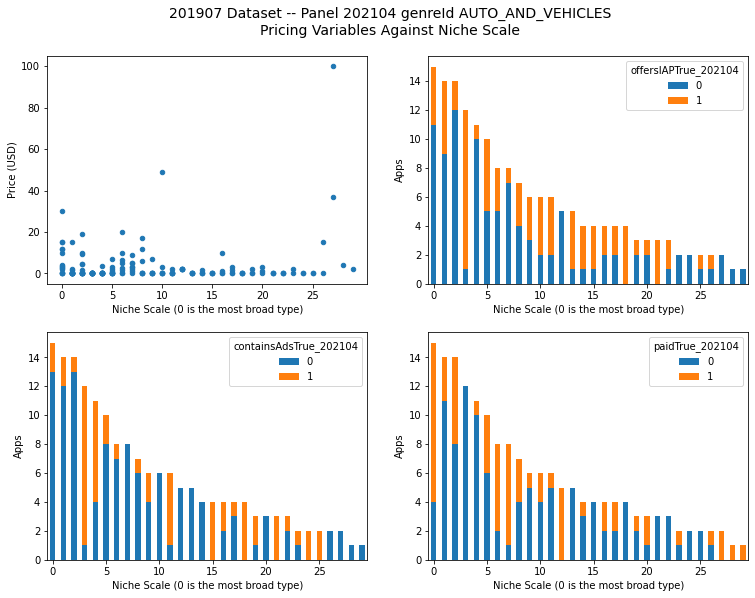

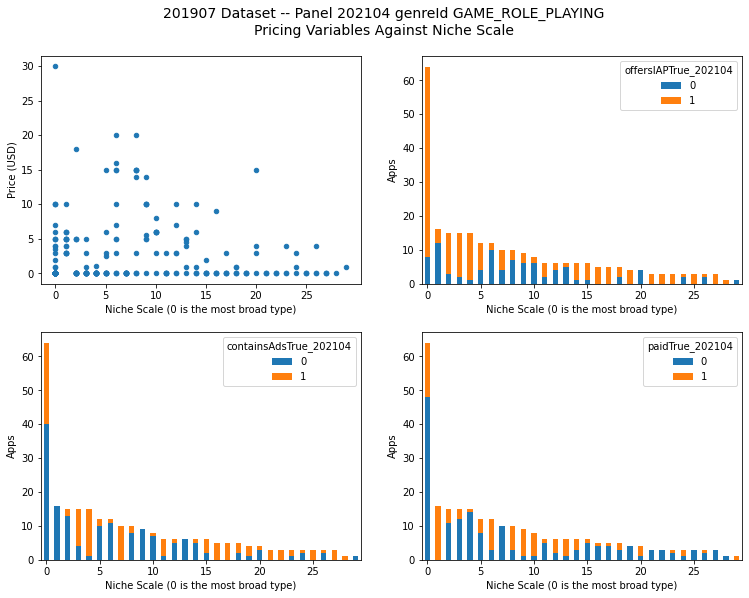

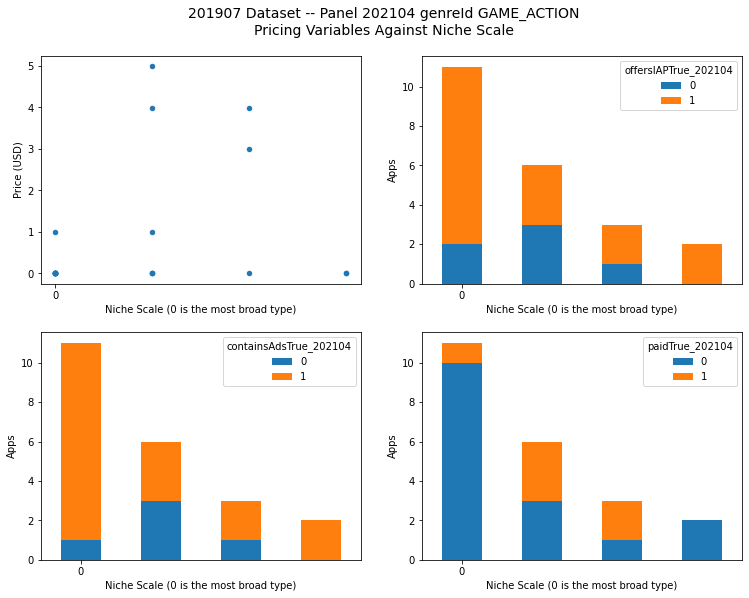

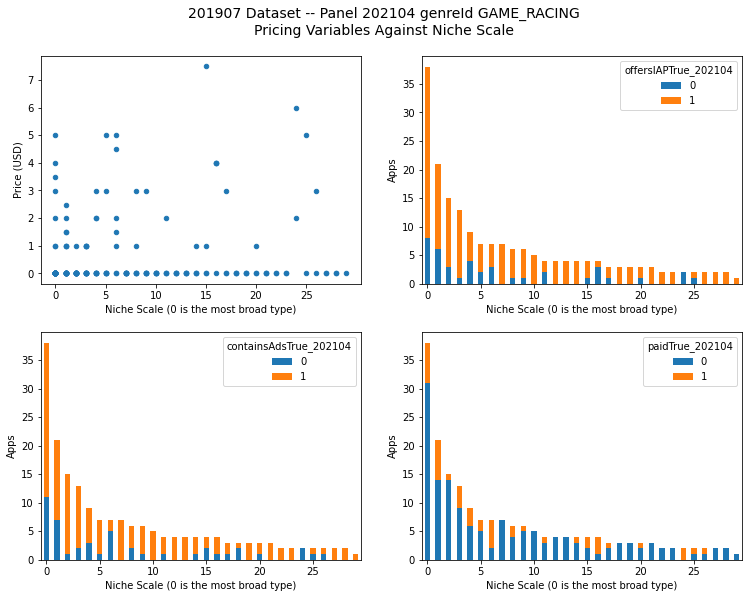

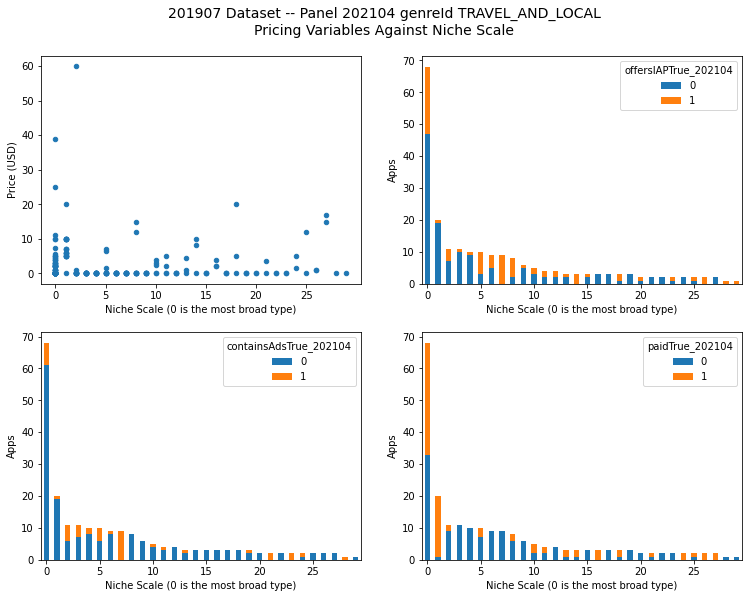

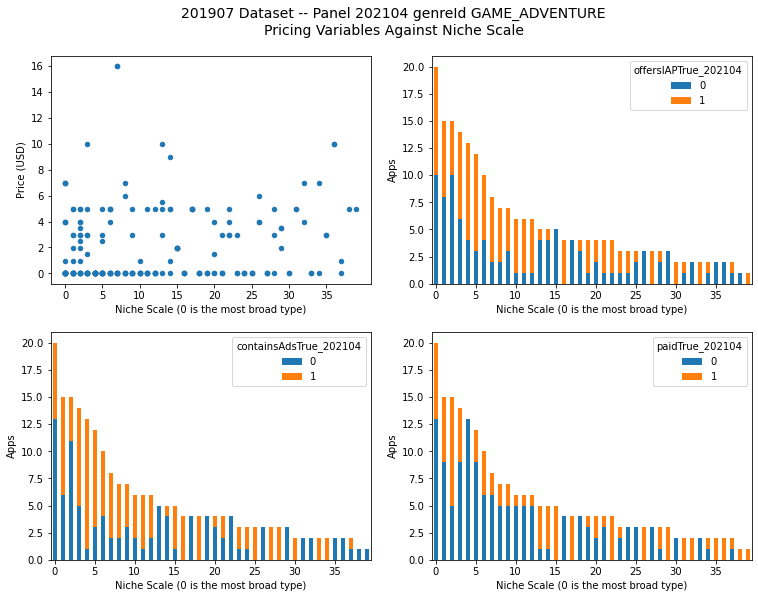

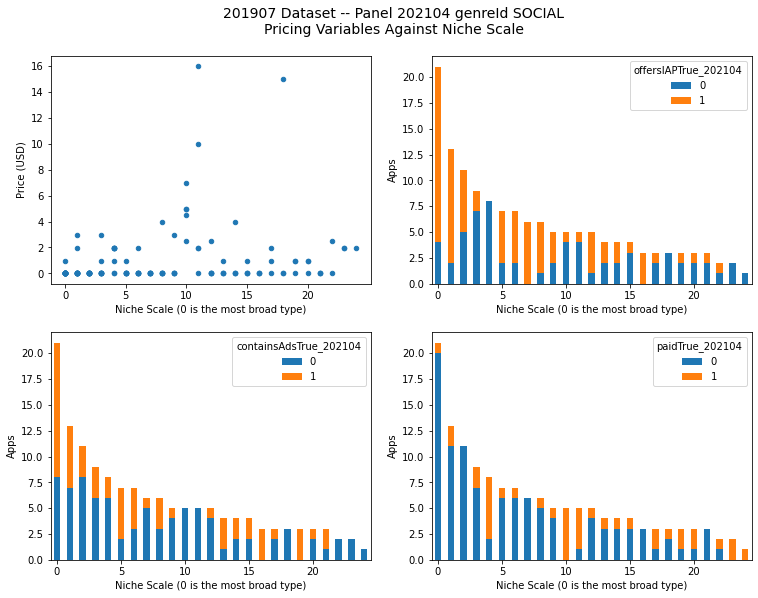

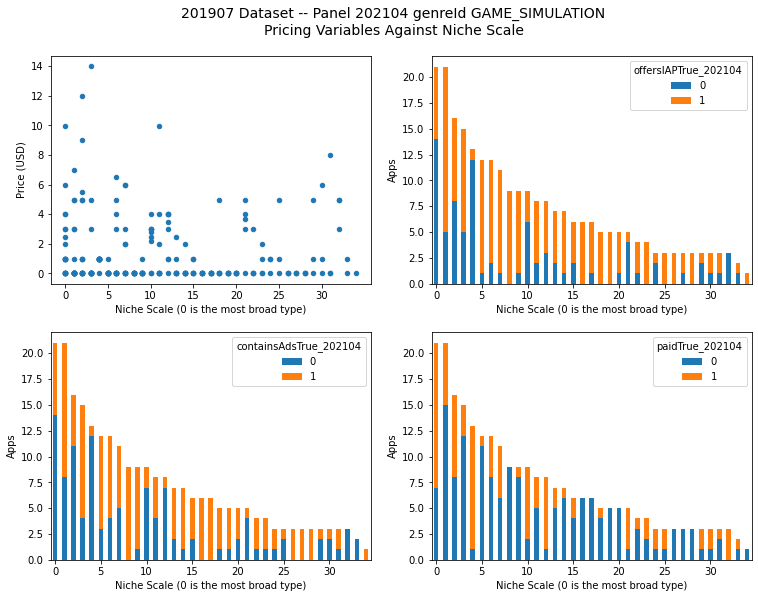

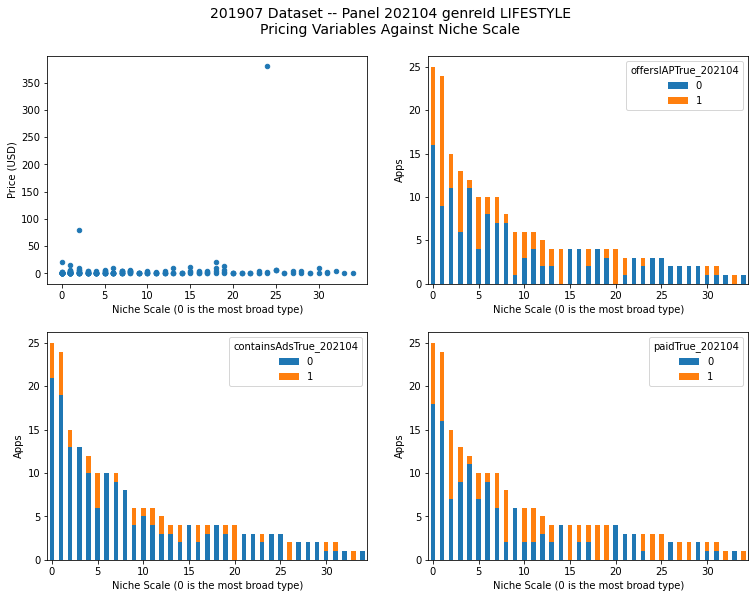

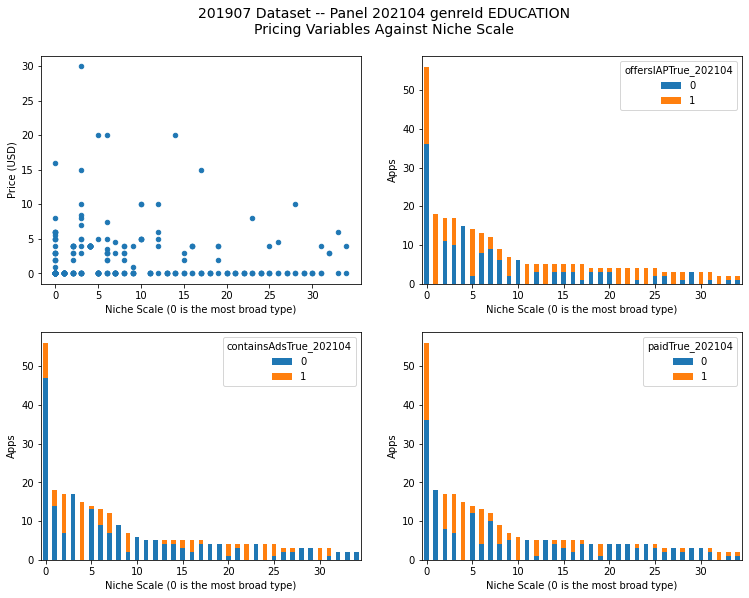

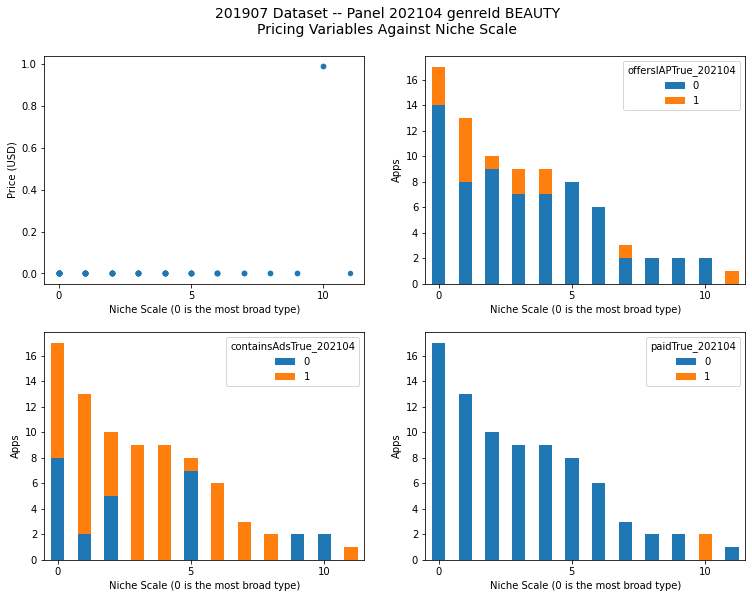

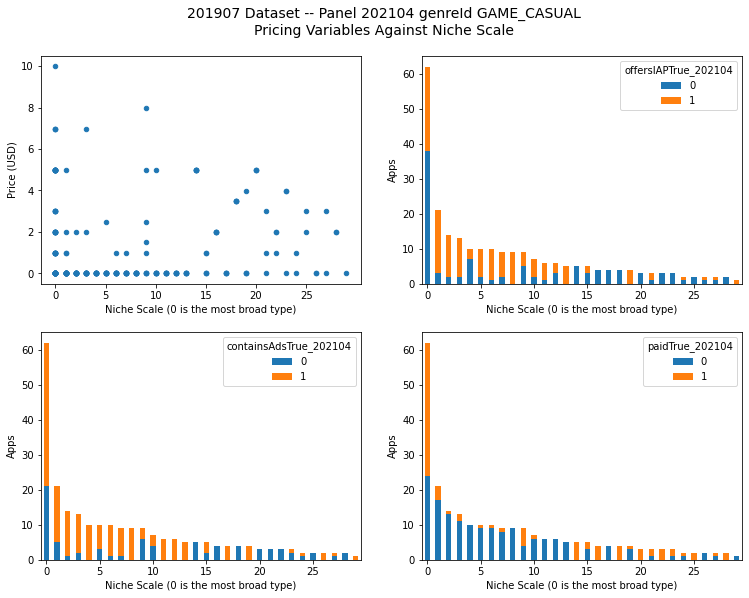

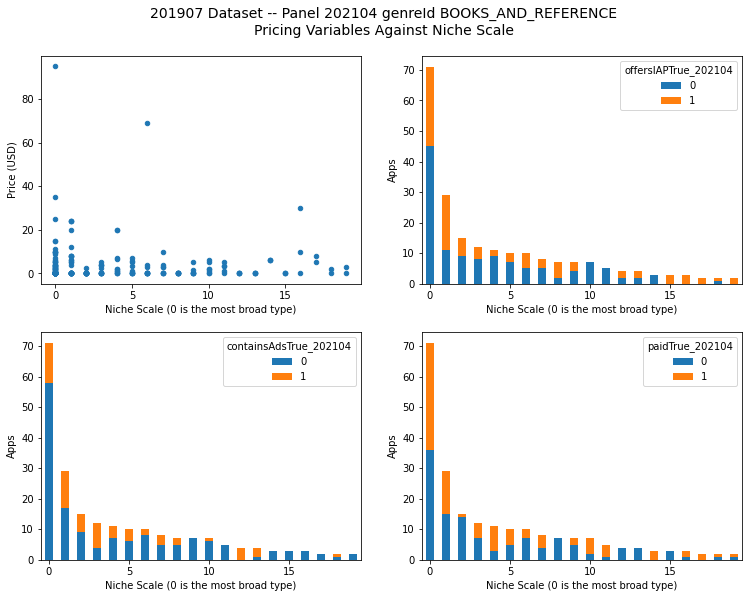

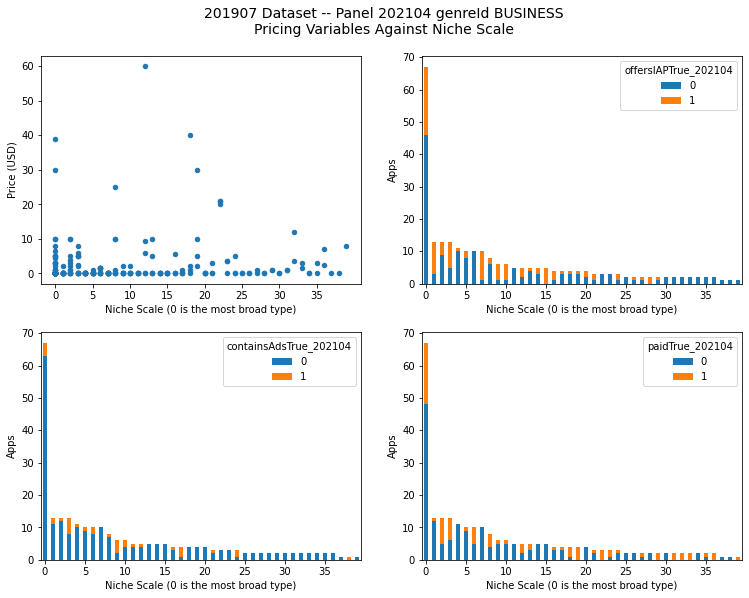

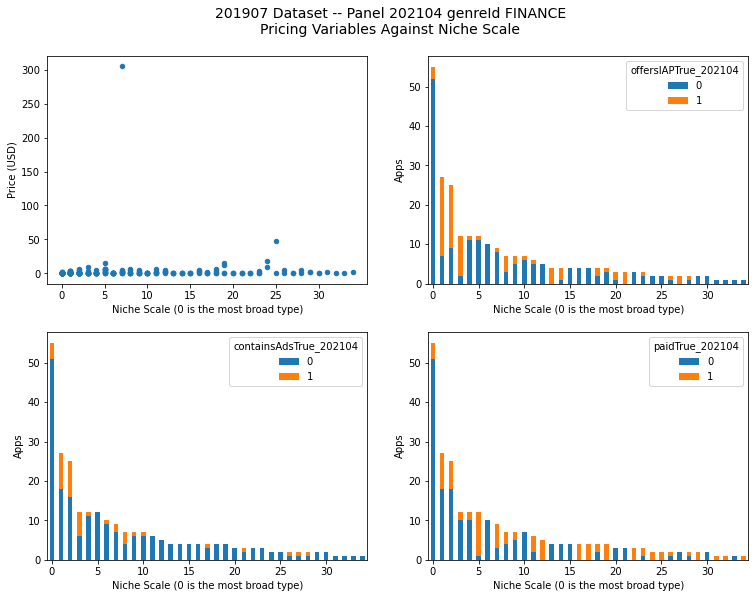

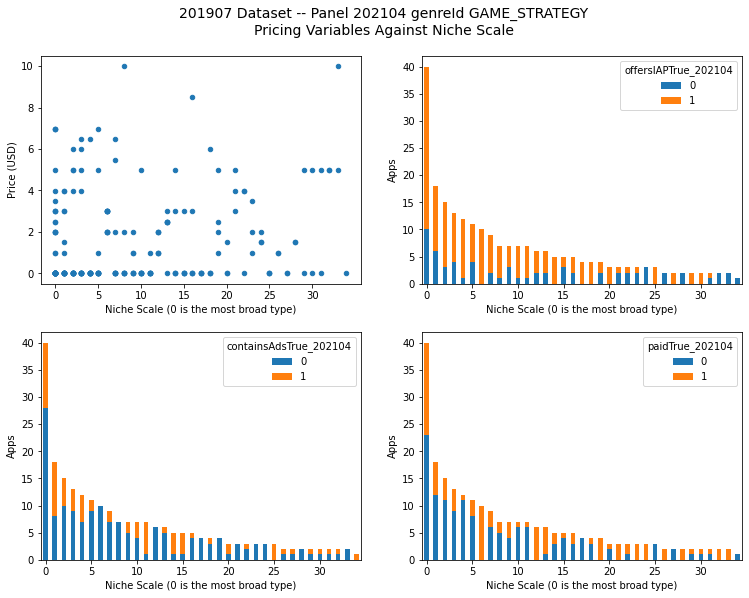

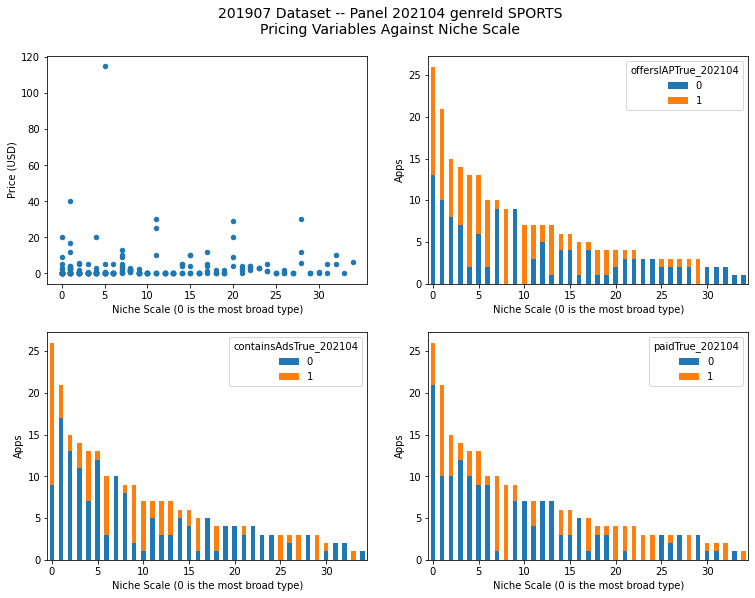

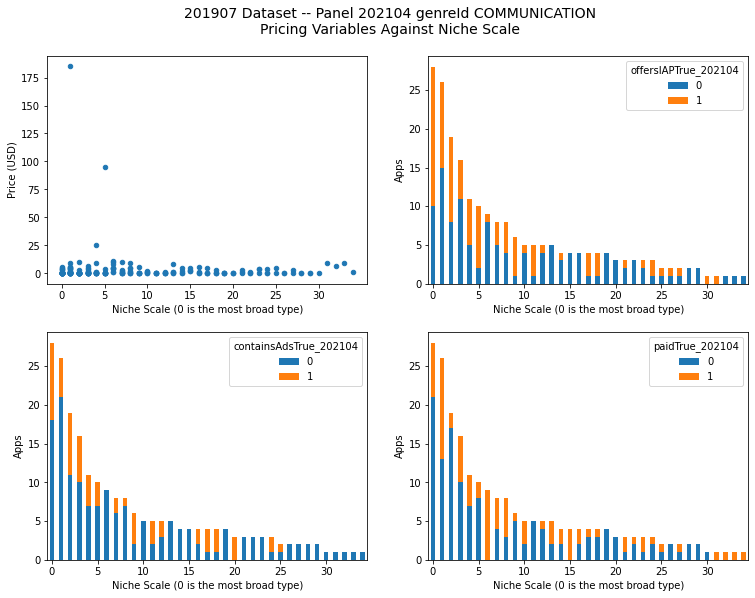

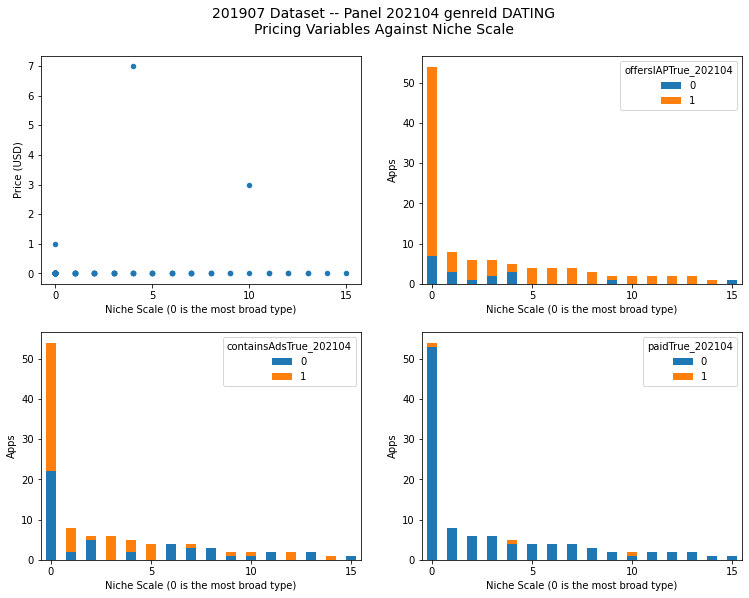

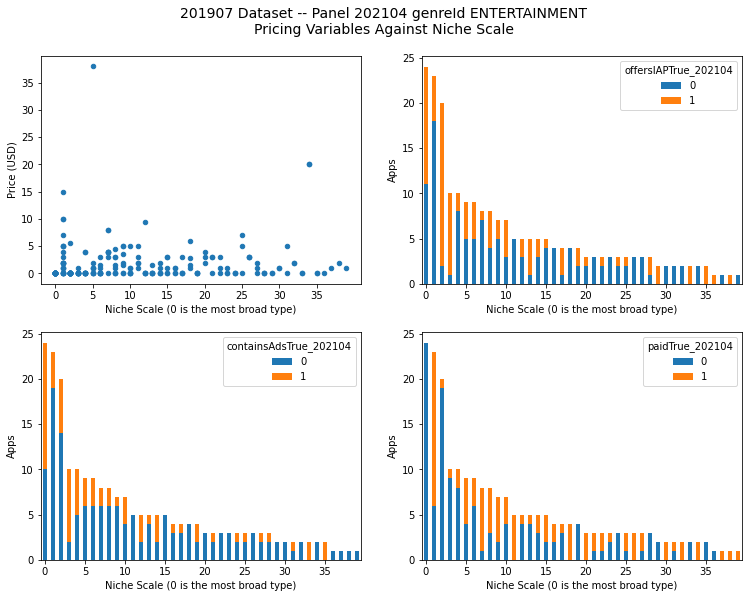

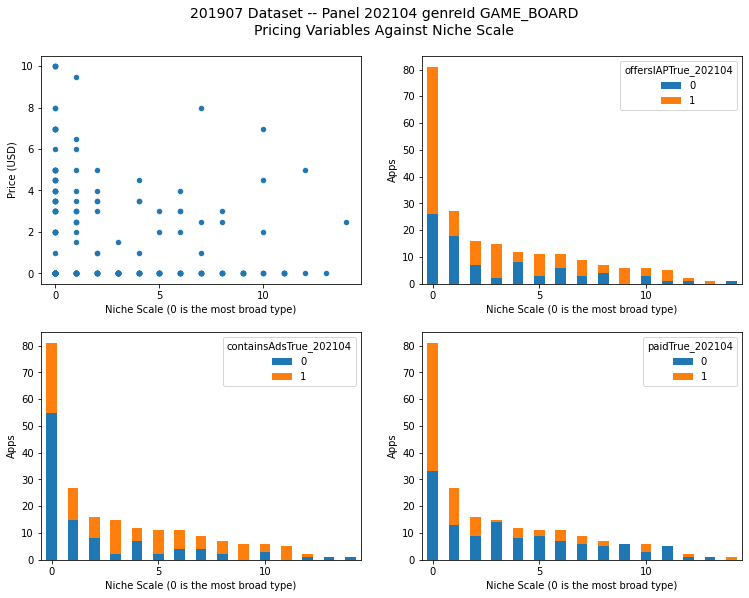

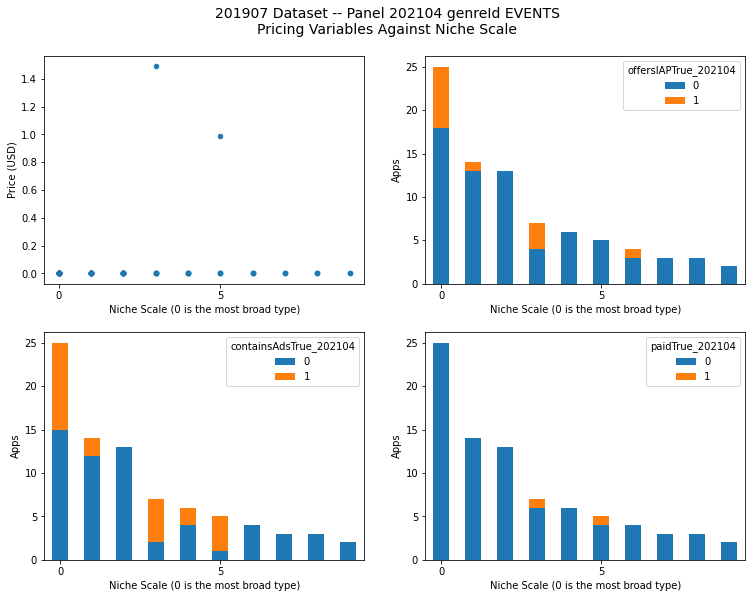

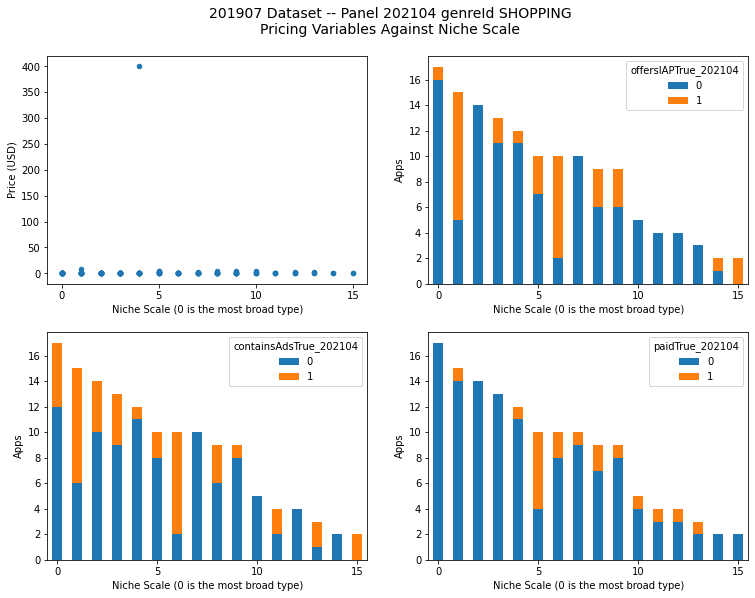

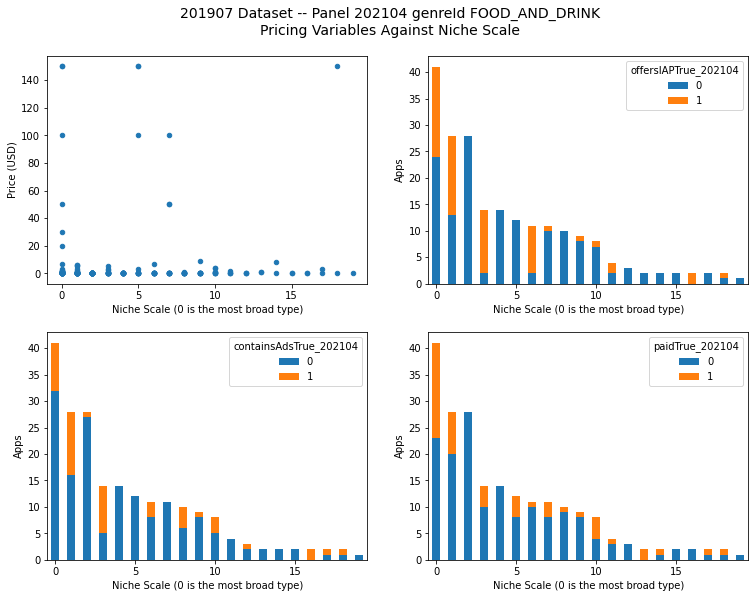

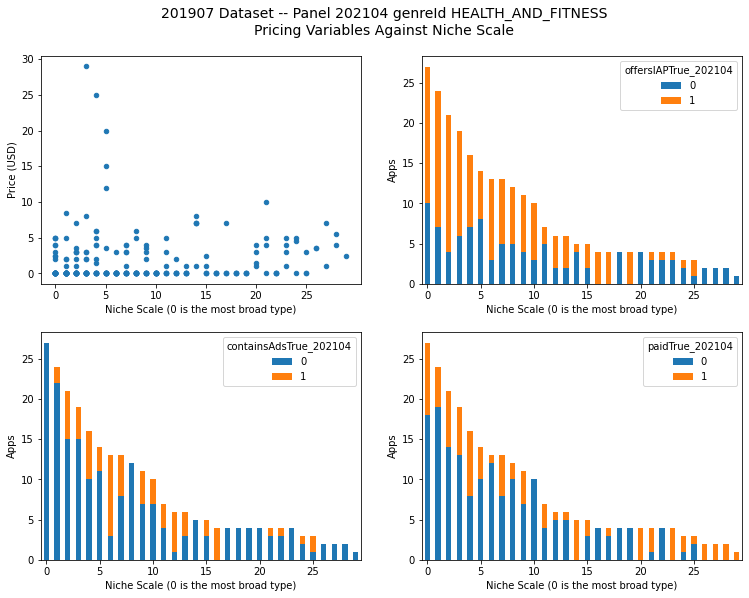

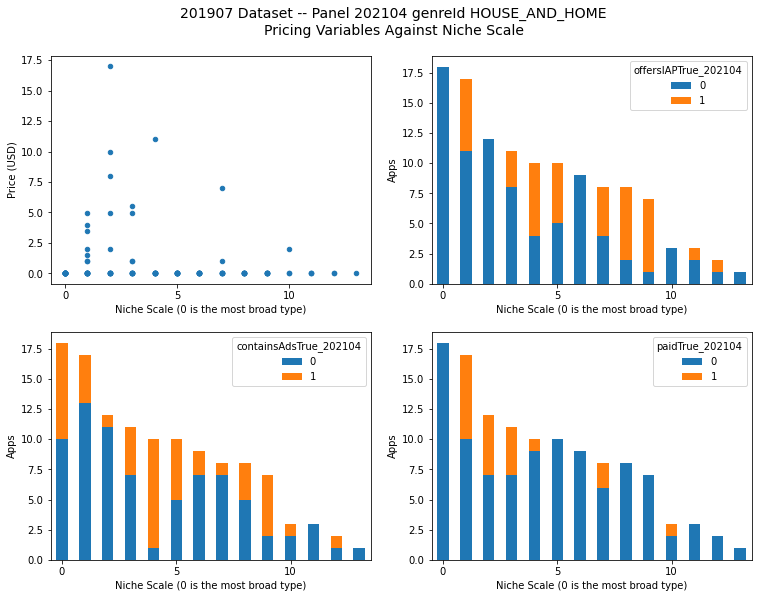

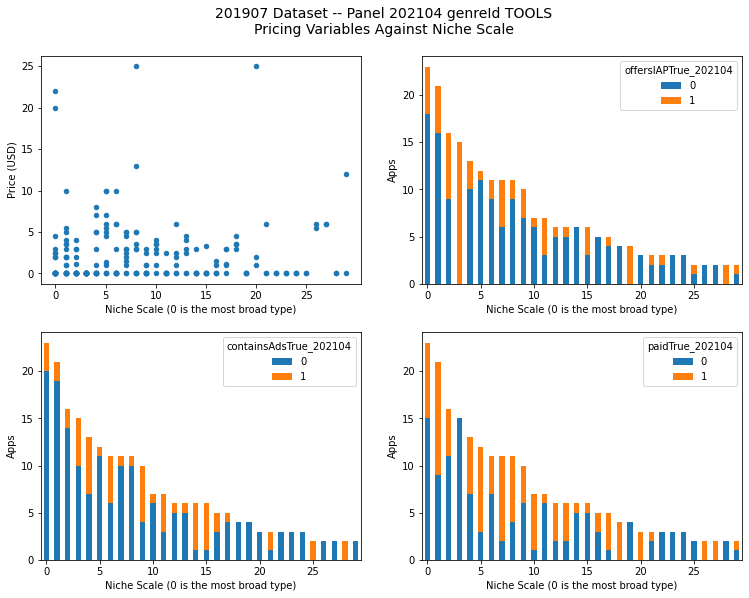

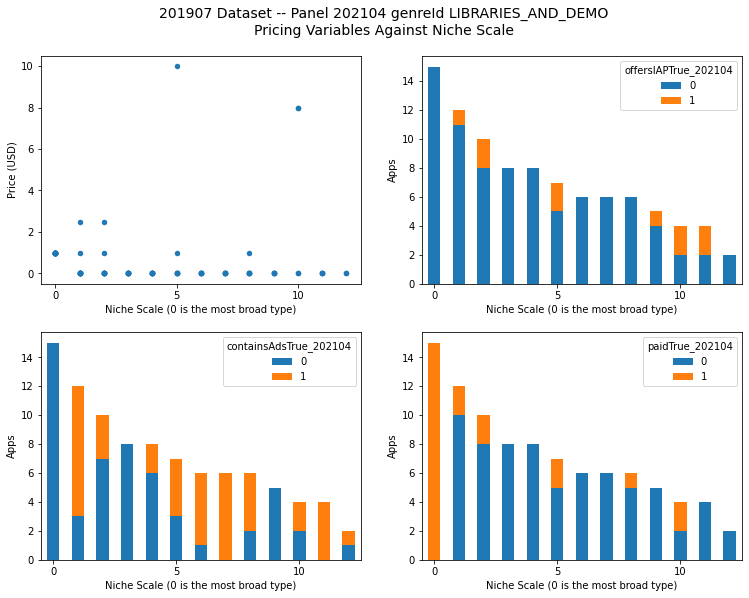

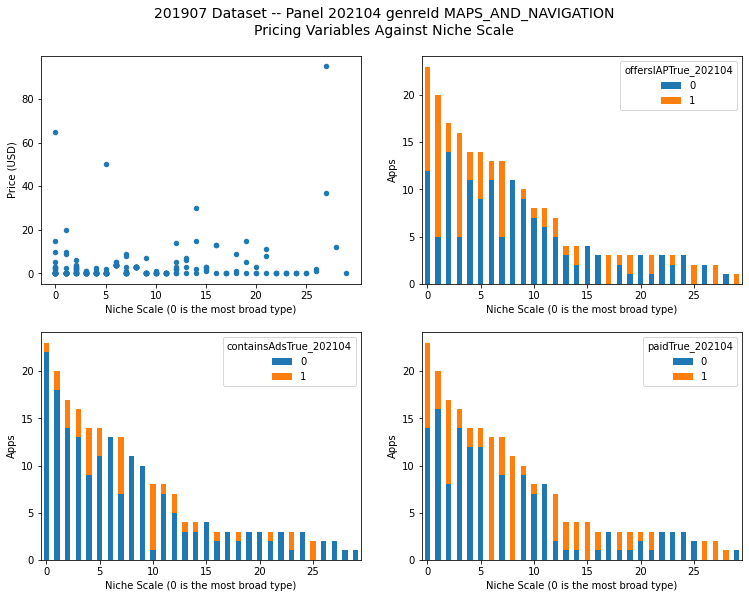

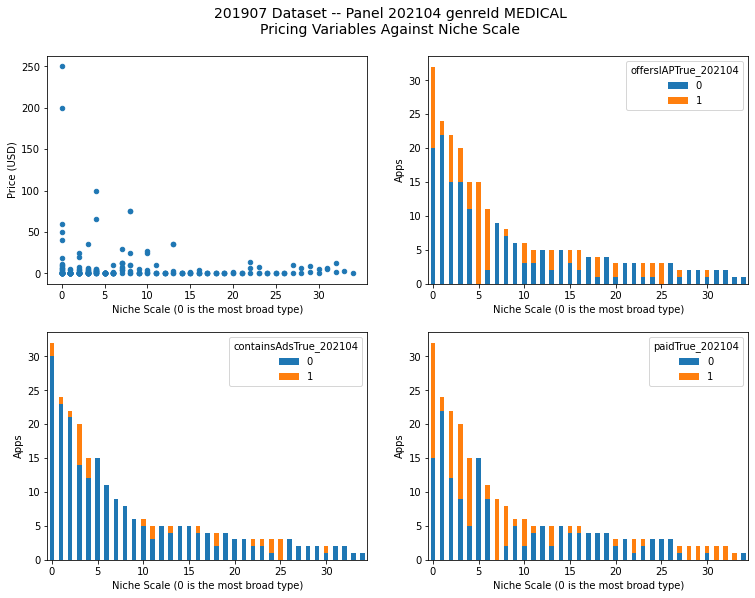

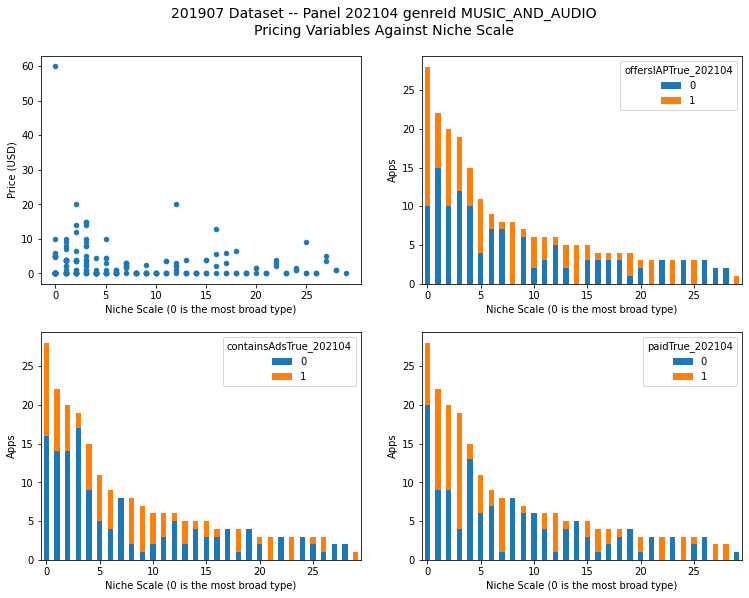

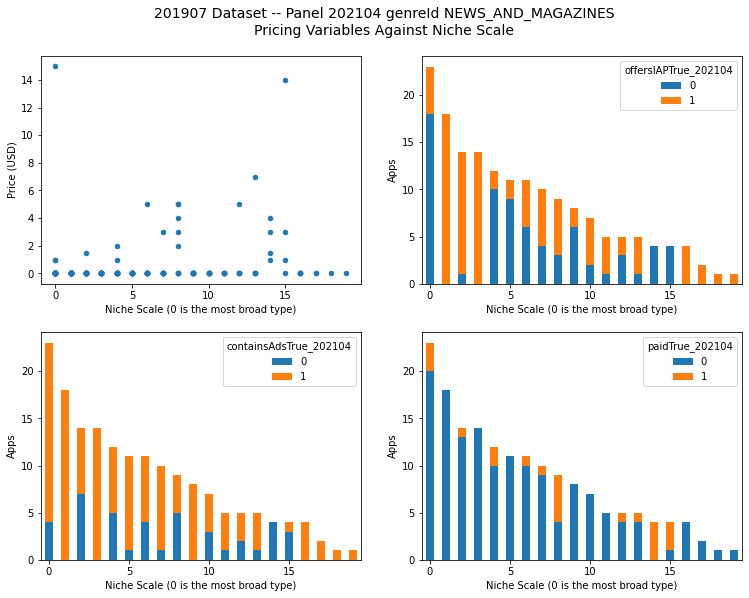

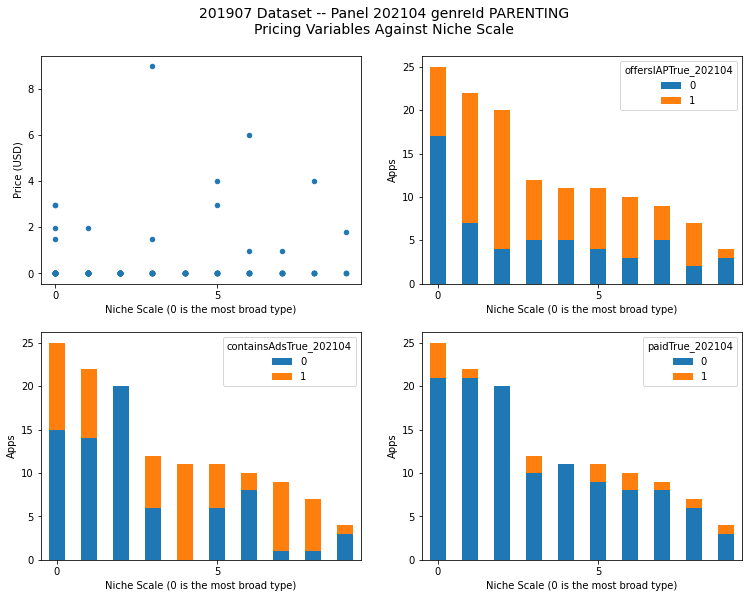

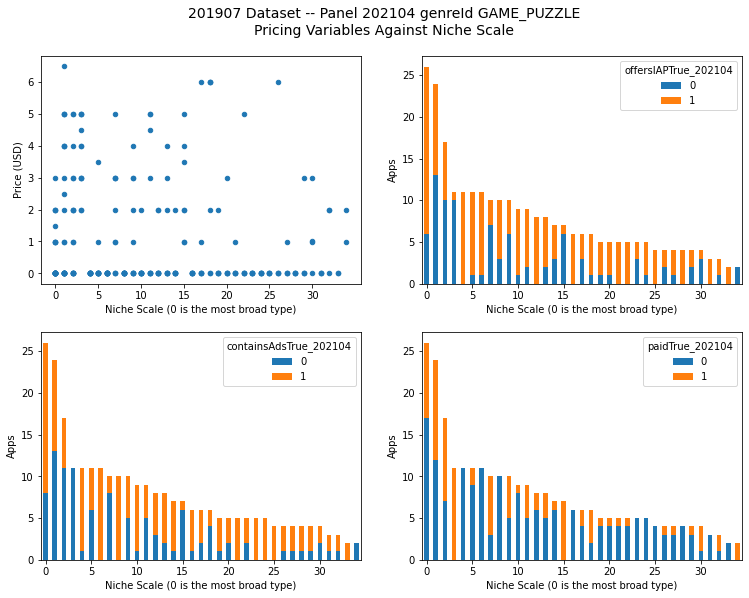

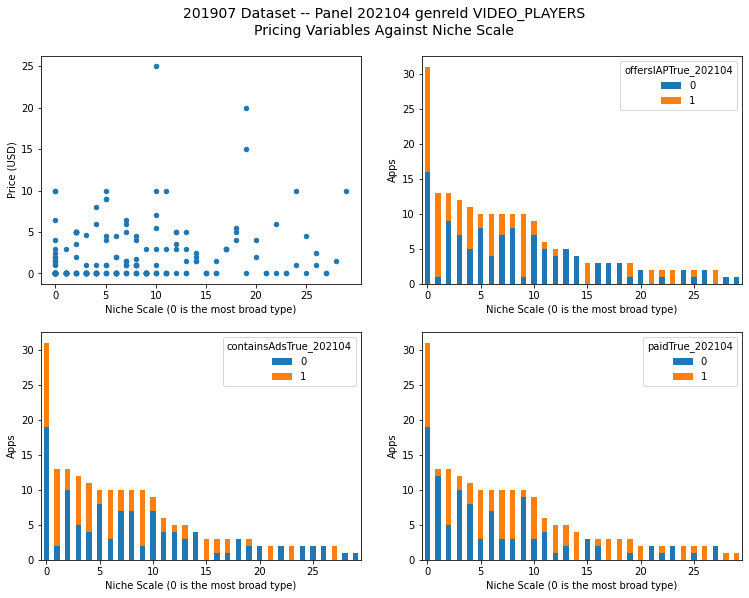

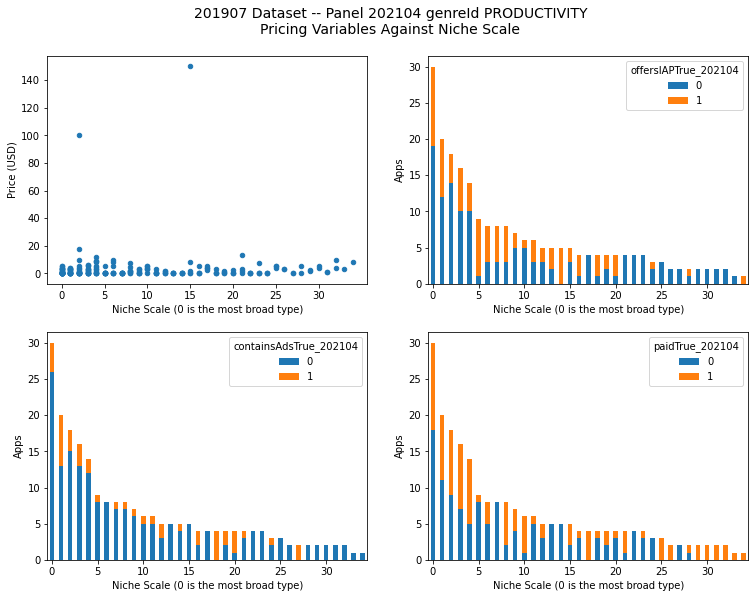

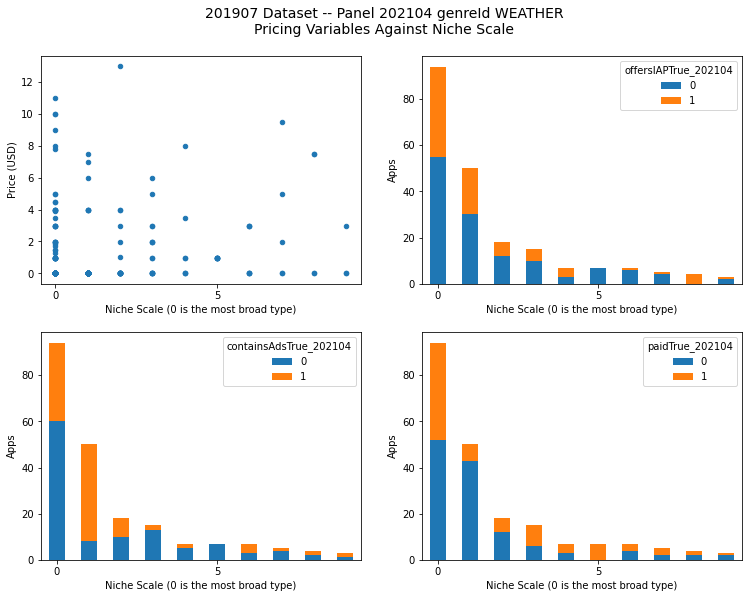

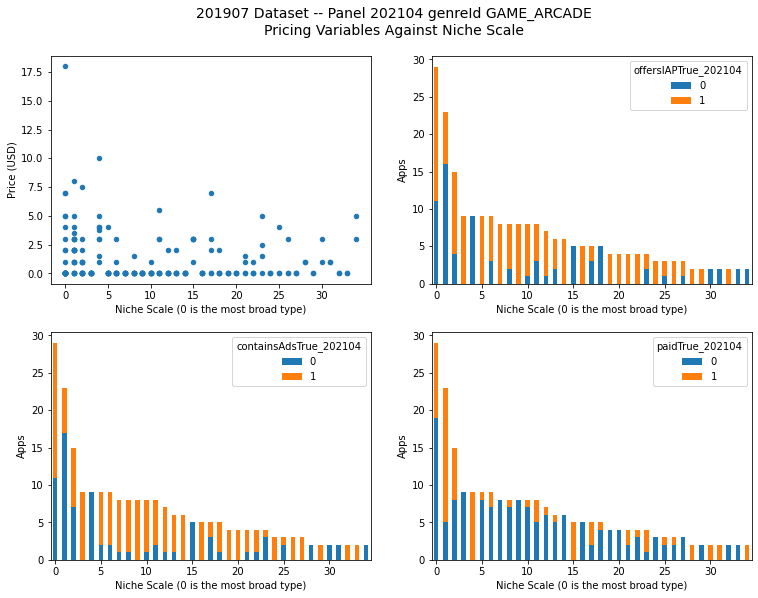

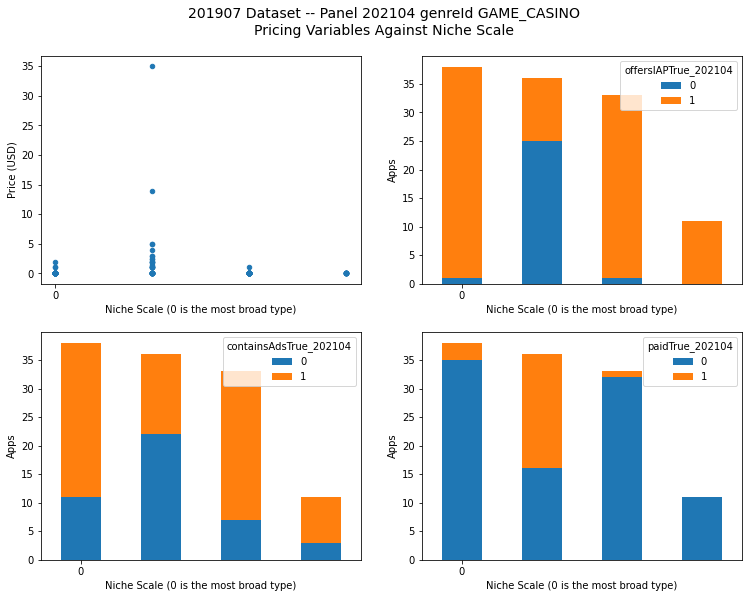

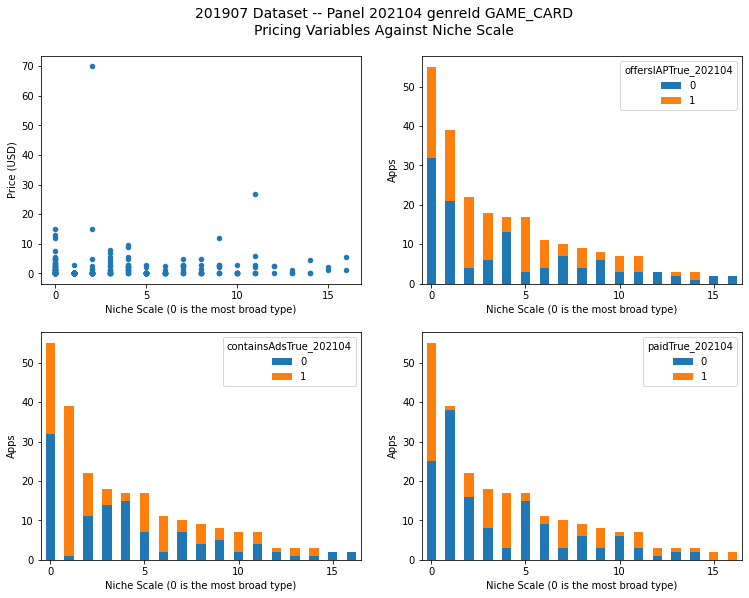

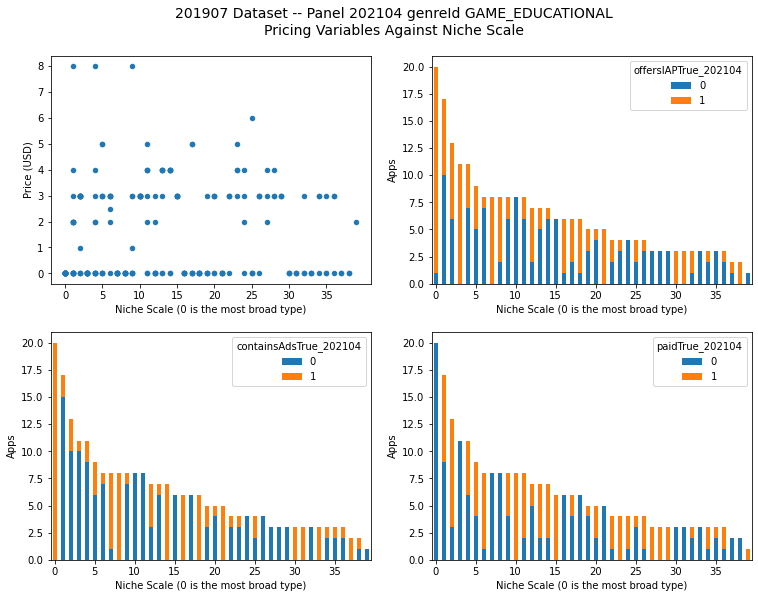

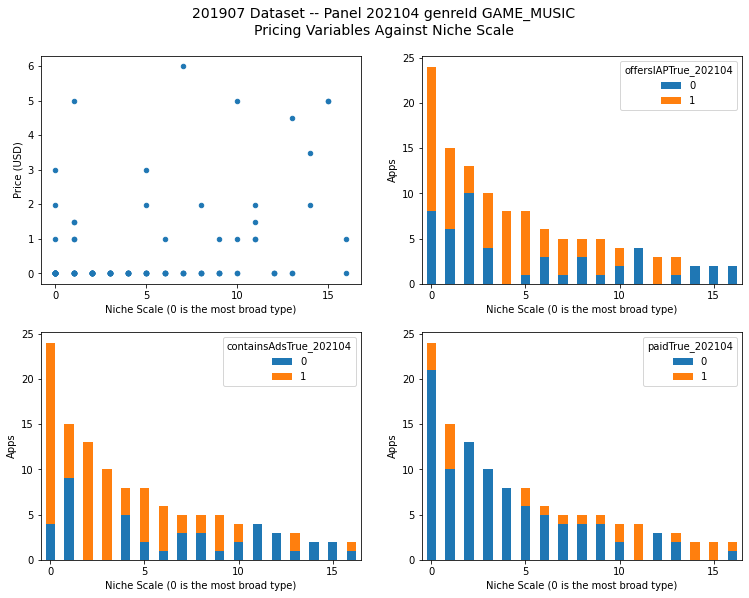

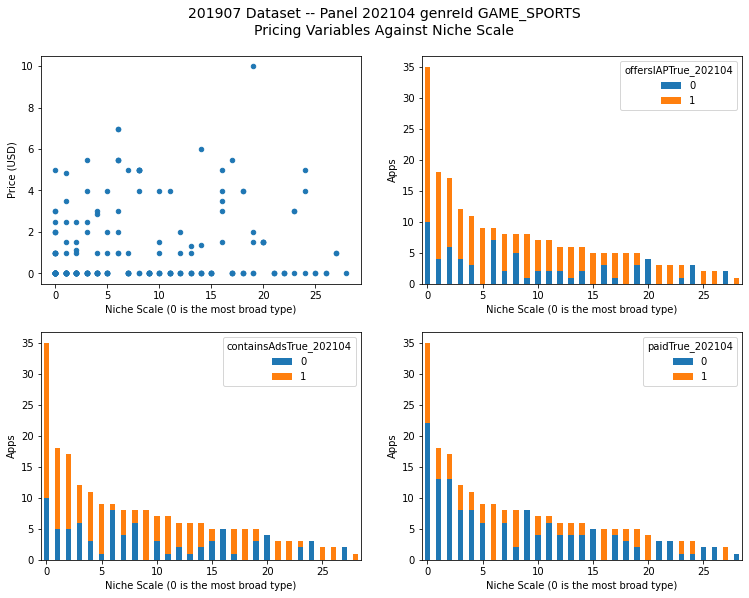

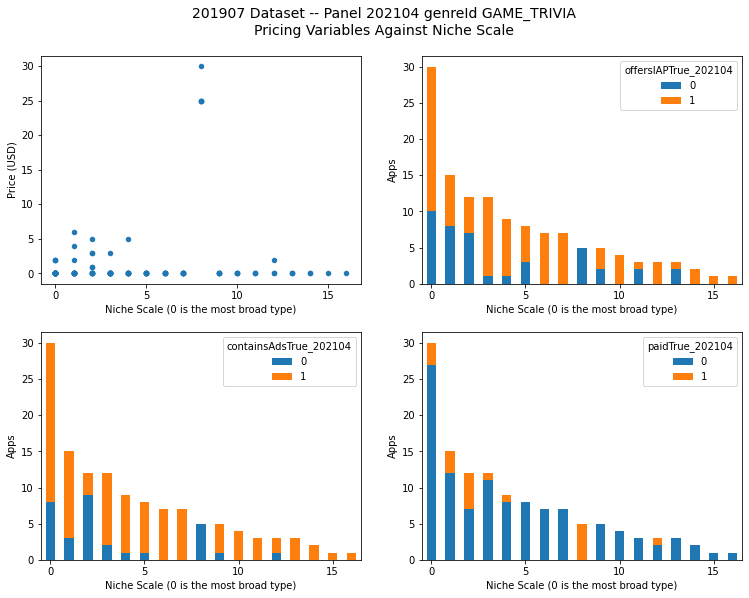

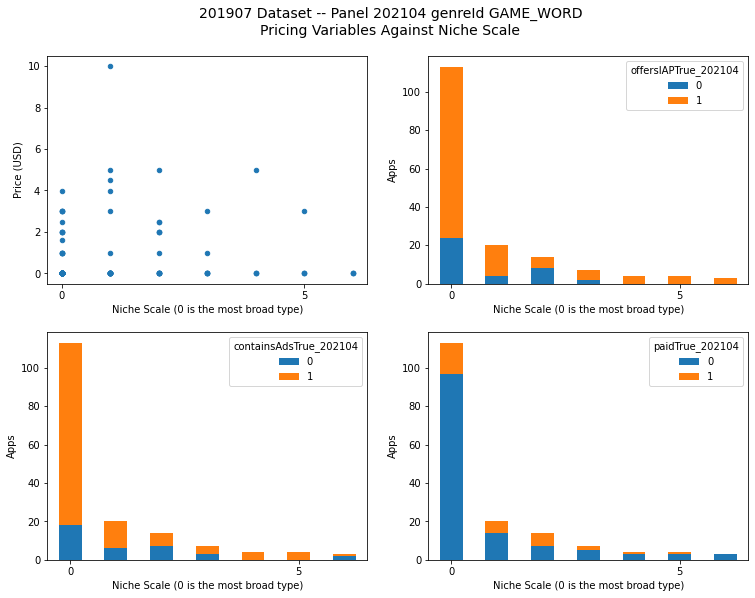

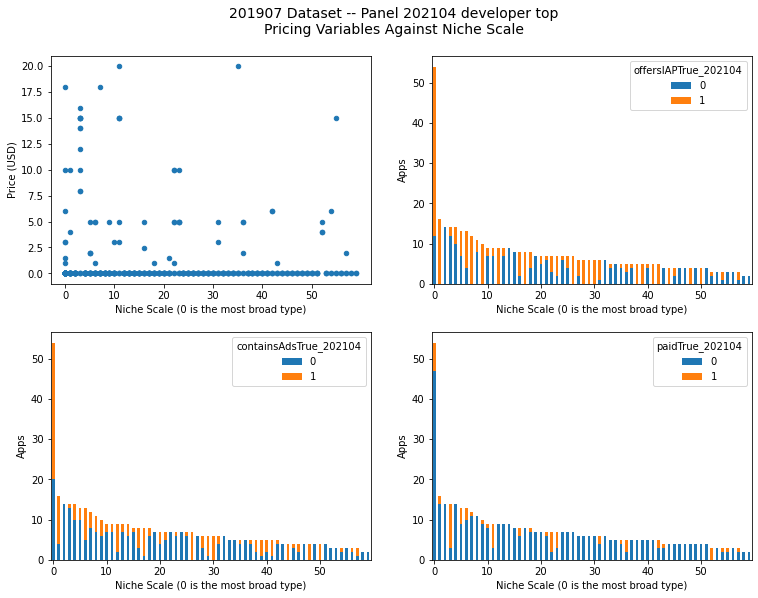

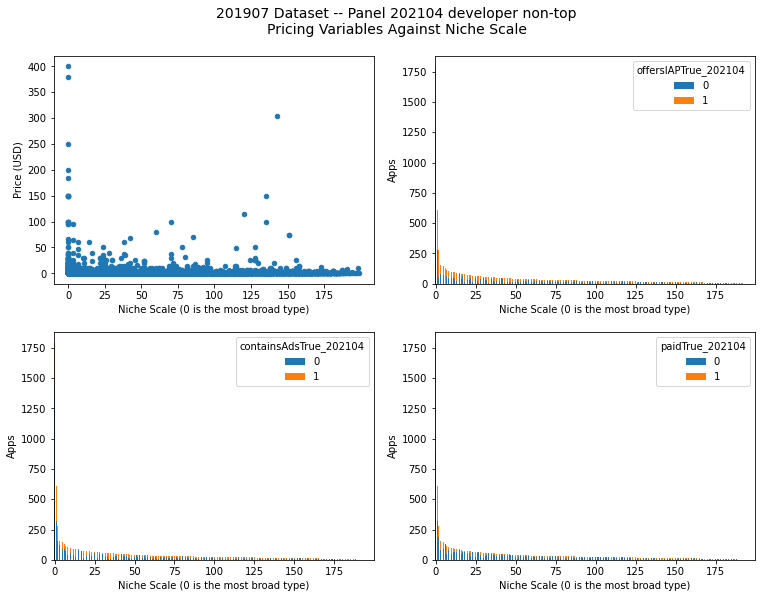

In [26]:
%run -i 'STEP5_Reg_Long_Table_Preparation.py'

d1 = reg_preparation(
         initial_panel=initial_panel,
         all_panels=all_panels,
         tcn = 'description'
    ).open_imputed_deleted_divided_df(
    ).open_predicted_labels_dict(
    ).combine_text_labels_with_df(
    ).create_subsample_name_dict(
    ).create_paid_dummies(
    ).create_generic_true_false_dummies(
        cat_var='offersIAP'
    ).create_generic_true_false_dummies(
        cat_var='containsAds'
    ).niche_scale_scatter_plot_against_key_vars(
        the_panel='202104')

In [20]:
test_df = d1[0].copy(deep=True)
np1 = test_df.index.to_numpy()
xx = np.arange(min(np1), max(np1) + 1, 10).astype(int)
print(xx)

TypeError: 'Figure' object is not subscriptable

In [24]:
test_df2 = d1[0].copy(deep=True)
np1 = test_df2['niche_indicators'].to_numpy()
xx = np.arange(min(np1), max(np1) + 1, 10).astype(int)
print(xx)

[  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]


In [ ]:
test_df = d1[24]

In [8]:
for i in d1.cdf.columns:
    if 'paid' in i:
        print(i)

paidTrue_201907
paidTrue_201908
paidTrue_201909
paidTrue_201912
paidTrue_202001
paidTrue_202003
paidTrue_202004
paidTrue_202009
paidTrue_202010
paidTrue_202011
paidTrue_202012
paidTrue_202101
paidTrue_202102
paidTrue_202103
paidTrue_202104


In [63]:
# debug
key_vars = ['price']
selected_vars = [i + '_' + '202104' for i in key_vars]
print(selected_vars)
df2 = d1.cdf.copy(deep=True)
svars = copy.deepcopy(selected_vars)
print(svars)
svars.extend(['ImputedminInstalls_tier1'])
print(svars)
df = df2.loc[df2['ImputedminInstalls_tier1']==1, svars]

['price_202104']
['price_202104']
['price_202104', 'ImputedminInstalls_tier1']


# Test Block for Regression

In [21]:
%run -i 'STEP6_Regression.py'

initial_panel='201907'
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102',
              '202103',
              '202104']
# paidTrue, offersIAP and containsAds are generated according to imputed variables
# to check, please review code in STEP5_Reg_Long_Table_Preparation.py

dep_vars = ['offersIAPTrue',
            'containsAdsTrue',
            'paidTrue',
            'Imputedprice']

independent_vars = [ 'PostDummy',
                     'DeMeanedImputedscore',
                     'DeMeanedminInstallsTop',
                     'DeMeanedminInstallsMiddle',
                     'ZScoreDeMeanedImputedreviews',
                     'contentRatingAdult',
                     'size',
                     'DaysSinceReleased']

/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP6_Regression.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [28]:
%run -i 'STEP6_Regression.py'

d1 = regression(
         initial_panel=initial_panel,
         all_panels=all_panels,
         dep_vars=dep_vars,
         independent_vars=independent_vars
        ).open_long_df_dict(
        ).add_subsample_names(
        ).select_x_y_for_subsample(
            n_niche_scales=20)

/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP6_Regression.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


genreId AUTO_AND_VEHICLES DeMeanedminInstallsTop  contains only 1 unique value 
dropped  DeMeanedminInstallsTop
genreId AUTO_AND_VEHICLES DeMeanedminInstallsMiddle  contains only 1 unique value 
dropped  DeMeanedminInstallsMiddle
genreId GAME_ACTION DeMeanedminInstallsTop  contains only 1 unique value 
dropped  DeMeanedminInstallsTop
genreId GAME_ACTION DeMeanedminInstallsMiddle  contains only 1 unique value 
dropped  DeMeanedminInstallsMiddle
genreId GAME_RACING  DeMeanedminInstallsTop and DeMeanedminInstallsMiddle are perfectly correlated 
genreId GAME_RACING  DROPPED DeMeanedminInstallsMiddle to avoid exog full rank error in regressions 
genreId TRAVEL_AND_LOCAL DeMeanedminInstallsTop  contains only 1 unique value 
dropped  DeMeanedminInstallsTop
genreId BEAUTY DeMeanedminInstallsTop  contains only 1 unique value 
dropped  DeMeanedminInstallsTop
genreId BEAUTY DeMeanedminInstallsMiddle  contains only 1 unique value 
dropped  DeMeanedminInstallsMiddle
genreId EVENTS DeMeanedminInstal

In [30]:
# OLS cross section regression
%run -i 'STEP6_Regression.py'

d2 = d1.slice_single_panel(
            the_panel='202104'
        ).all_regressions(
            reg_func = d1._cross_section_regression,
            xy_df=d1.single_panel_df
        ).put_reg_results_into_pandas(
            reg_folder_name='cross_section')

/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP6_Regression.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


full full NicheDummy
(141075, 14)
(9405, 12)
full full NicheScaleDummies
(141075, 50)
(9405, 30)
minInstalls ImputedminInstalls_tier1 NicheDummy
(27000, 12)
(1800, 10)
minInstalls ImputedminInstalls_tier2 NicheDummy
(63465, 12)
(4231, 10)
minInstalls ImputedminInstalls_tier3 NicheDummy
(50610, 12)
(3374, 10)
genreId ART_AND_DESIGN NicheDummy
(2505, 14)
(167, 12)
genreId COMICS NicheDummy
(1245, 14)
(83, 12)
genreId PERSONALIZATION NicheDummy
(4110, 14)
(274, 12)
genreId PHOTOGRAPHY NicheDummy
(3120, 14)
(208, 12)
genreId AUTO_AND_VEHICLES NicheDummy
(2565, 12)
(171, 10)
genreId GAME_ROLE_PLAYING NicheDummy
(3930, 14)
(262, 12)
genreId GAME_ACTION NicheDummy
(330, 12)
(22, 10)
genreId GAME_RACING NicheDummy
(2820, 13)
(188, 11)
genreId TRAVEL_AND_LOCAL NicheDummy
(3210, 13)
(214, 11)
genreId GAME_ADVENTURE NicheDummy
(3315, 14)
(221, 12)
genreId SOCIAL NicheDummy
(2145, 14)
(143, 12)
genreId GAME_SIMULATION NicheDummy
(3810, 14)
(254, 12)
genreId LIFESTYLE NicheDummy
(3180, 14)
(212, 12

In [31]:
# panel regression
%run -i 'STEP6_Regression.py'

d2 = d1.all_regressions(
            reg_func = d1._panel_regression,
            xy_df=d1.reg_dict_xy
        ).put_reg_results_into_pandas(
            reg_folder_name='panel')

/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP6_Regression.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


start regressing on  full full NicheDummy offersIAPTrue
start Pooled_ols regression
start RE regression
finished regressing on  full full NicheDummy offersIAPTrue
start regressing on  full full NicheDummy containsAdsTrue
start Pooled_ols regression
start RE regression
finished regressing on  full full NicheDummy containsAdsTrue
start regressing on  full full NicheDummy paidTrue
start Pooled_ols regression
start RE regression
finished regressing on  full full NicheDummy paidTrue
start regressing on  full full NicheDummy Imputedprice
start Pooled_ols regression
start RE regression
finished regressing on  full full NicheDummy Imputedprice
start regressing on  full full NicheScaleDummies offersIAPTrue
start Pooled_ols regression
start RE regression
finished regressing on  full full NicheScaleDummies offersIAPTrue
start regressing on  full full NicheScaleDummies containsAdsTrue
start Pooled_ols regression
start RE regression
finished regressing on  full full NicheScaleDummies containsAdsTru

/home/naixin/anaconda3/envs/GOOGLE_PLAY/lib/python3.8/site-packages/linearmodels/panel/results.py:84: RuntimeWarning: invalid value encountered in sqrt
  return Series(np.sqrt(np.diag(self.cov)), self._var_names, name="std_error")


# Test Block for Latex Tables


In [32]:
%run -i 'STEP6_Regression.py'
initial_panel='201907'
all_panels = ['201907',
              '201908',
              '201909',
              '201912',
              '202001',
              '202003',
              '202004',
              '202009',
              '202010',
              '202011',
              '202012',
              '202101',
              '202102',
              '202103',
              '202104']
# paidTrue, offersIAP and containsAds are generated according to imputed variables
# to check, please review code in STEP5_Reg_Long_Table_Preparation.py

dep_vars = ['offersIAPTrue',
            'containsAdsTrue',
            'paidTrue',
            'Imputedprice']

independent_vars = [ 'PostDummy',
                     'DeMeanedImputedscore',
                     'DeMeanedminInstallsTop',
                     'DeMeanedminInstallsMiddle',
                     'ZScoreDeMeanedImputedreviews',
                     'contentRatingAdult',
                     'size',
                     'DaysSinceReleased']

/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP6_Regression.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [42]:
%run -i 'STEP6_Regression.py'

d1 = regression(
         initial_panel=initial_panel,
         all_panels=all_panels,
         dep_vars=dep_vars,
         independent_vars=independent_vars
        )

df_list = []
for result_type in ['panel', 'cross_section']:
    for table_type in ['table_1', 'table_2', 'table_3']:
        df = d1.select_cols_and_rows_result_PostXNicheDummy(
            result_type=result_type,
            table_type=table_type
        )
        dfs = d1.add_pvalue_asterisk_to_results(df)
        dfs2 = d1.set_row_and_column_groups(
            df=dfs,
            result_type=result_type)
        dfs2 = d1.convert_to_latex(
            df=dfs2,
            result_type=result_type,
            table_type=table_type)
        df_list.append(dfs2)

/home/naixin/Insync/naixin88@sina.cn/OneDrive/__CODING__/PycharmProjects/GOOGLE_PLAY/scripts/STEP6_Regression.py:5: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)
/home/naixin/anaconda3/envs/GOOGLE_PLAY/lib/python3.8/site-packages/pandas/core/generic.py:4153: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [ ]:
dfs2 = d1.set_row_and_column_groups(
            df=dfs,
            result_type=result_type)
        dfs2 = d1.convert_to_latex(
            df=dfs2,
            result_type=result_type,
            table_type=table_type)
